# Surprise House SalePrice Prediction

> Developer - Shashank Bhatnagar

 ## Problem Statment
 > A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price.
 

- The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

- The company wants to know:

- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.

- Also, determine the optimal value of lambda for ridge and lasso regression.

> ## Steps:

> ## EDA

- Data Clearning and Missing Data Analysis
- Outlier Analysis & Treatment Assumption values > Q3+1.5*IQR and values < Q1-1.5*IQR will be treated
- Transforming Categorical Columns
- Univariate Analysis
- Bivariate Analysis
- Multivariate Analysis

> ## Model Preperation

- Training and Test data split
- Feature Scaling - StandardScaler
- Feature Engineering & Selection using RFE and Variance Inflation factor
- Model preperation using OLS & Linear Regression
- Regularization Ridge & Lasso Regression Model
- Residual Analysis
- Model Evaluation & Assessment
- Prediction 
- Conclusion & Analysis

In [1]:
# Load Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import Ridge,Lasso,LinearRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold
from sklearn.metrics import r2_score,mean_squared_error
from statsmodels.api import OLS
from sklearn.feature_selection import RFE
import statsmodels.api as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Data Load

In [2]:
data = pd.read_csv("train.csv")

In [3]:
data.shape

(1460, 81)

In [4]:
data.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Metadata Information

In [5]:
print ("Rows     : " ,data.shape[0])
print ("Columns  : " ,data.shape[1])
print ("\nFeatures : \n" ,data.columns.tolist())
print ("\nMissing values :  ", data.isnull().sum().values.sum())
print ("\nUnique values :  \n",data.nunique())

Rows     :  1460
Columns  :  81

Features : 
 ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3

We have a dataset which contains 6965 missing values Id contains all unique values

# Data Cleaning - Missing Data Analysis & Treatment

In [6]:
# Dropping ID columns since all values are unique

data_v1 = data.drop(columns=['Id'])

In [7]:
# Percentage of Missing Columns
pd.options.display.max_rows = None #(<< This function is use to display all rows >>)
round(100 * data_v1.isnull().sum()/len(data_v1.index),2)


MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF          0.00
2ndFlrSF   

In [8]:
    ## No of rows which have the all null values

print("No of rows = {} which have null values in all columns".format(data_v1.isnull().all(axis=1).sum()))

No of rows = 0 which have null values in all columns


In [9]:
    ## No of colummns which have the all null values

print("No of columns = {} which have null values in all rows".format(data_v1.isnull().all(axis=0).sum()))

No of columns = 0 which have null values in all rows


In [10]:
    # dropping columns which have null values in all the rows i.e. 100 % Null Values

data_v1.dropna(axis=1, how='all',inplace=True)

In [11]:
    # Check Duplicate Rows - No Duplicate rows found

duplicate = data_v1[data_v1.duplicated()]

duplicate

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [12]:
                            # MISSING DATA TREATMENT ANALYSIS SUMMARY #
# # Columns which are left with Null Values Updating status followed by sequential steps and analysis below

# Dropping Alley Since percentage of missing values is 93.77 imputing values will be insignificant
# Dropping PoolQC Since percentage of missing values is 99.52 imputing values will be insignificant
# Dropping Fence Since percentage of missing values is 80.75 imputing values will be insignificant
# Dropping MiscFeature Since percentage of missing values is 96.30 imputing values will be insignificant
# Dropping FireplaceQu Since percentage of missing values is 47.26 imputing values will be insignificant
# Dropping LotFrontage Since percentage of missing values is 17.74 imputing values will be insignificant

data_v1 = data_v1.drop(['Alley','PoolQC','Fence','MiscFeature','FireplaceQu','LotFrontage'],axis=1)

In [13]:
# Percentage of Missing Columns Left
pd.options.display.max_rows = None #(<< This function is use to display all rows >>)
round(100 * data_v1.isnull().sum()/len(data_v1.index),2)



MSSubClass       0.00
MSZoning         0.00
LotArea          0.00
Street           0.00
LotShape         0.00
LandContour      0.00
Utilities        0.00
LotConfig        0.00
LandSlope        0.00
Neighborhood     0.00
Condition1       0.00
Condition2       0.00
BldgType         0.00
HouseStyle       0.00
OverallQual      0.00
OverallCond      0.00
YearBuilt        0.00
YearRemodAdd     0.00
RoofStyle        0.00
RoofMatl         0.00
Exterior1st      0.00
Exterior2nd      0.00
MasVnrType       0.55
MasVnrArea       0.55
ExterQual        0.00
ExterCond        0.00
Foundation       0.00
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinSF1       0.00
BsmtFinType2     2.60
BsmtFinSF2       0.00
BsmtUnfSF        0.00
TotalBsmtSF      0.00
Heating          0.00
HeatingQC        0.00
CentralAir       0.00
Electrical       0.07
1stFlrSF         0.00
2ndFlrSF         0.00
LowQualFinSF     0.00
GrLivArea        0.00
BsmtFullBath     0.00
BsmtHalfBa

In [14]:
# MasVnrType Analysis

print("MasVnrType Percentage of unique values  is :",round(100*data_v1[['MasVnrType']].nunique()[0]/len(data_v1.index),2))
print("MasVnrType Percentage of Missing values  is :",round(100*data_v1[['MasVnrType']].isnull().sum()/len(data_v1.index),2))

#Replacing the values with mode Since this is a Categorical Variable and see that None has highestno of value counts

print('Before',data_v1['MasVnrType'].value_counts())

data_v1['MasVnrType'] = data_v1['MasVnrType'].fillna(data_v1['MasVnrType'].mode()[0])

print('After',data_v1['MasVnrType'].value_counts())

MasVnrType Percentage of unique values  is : 0.27
MasVnrType Percentage of Missing values  is : MasVnrType    0.55
dtype: float64
Before None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
After None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64


In [15]:
# MasVnrArea Analysis

print("MasVnrArea Percentage of unique values  is :",round(100*data_v1[['MasVnrArea']].nunique()[0]/len(data_v1.index),2))
print("Before Missing Value treatment MasVnrArea Percentage of Missing values  is :",round(100*data_v1[['MasVnrArea']].isnull().sum()/len(data_v1.index),2))

print(data_v1['MasVnrArea'].describe())

#Since it has Outliers hence replacing the values with median

data_v1['MasVnrArea'] = data_v1['MasVnrArea'].fillna(data_v1['MasVnrArea'].median())

print("After Missing Value treatment MasVnrArea Percentage of Missing values  is :",round(100*data_v1[['MasVnrArea']].isnull().sum()/len(data_v1.index),2))



MasVnrArea Percentage of unique values  is : 22.4
Before Missing Value treatment MasVnrArea Percentage of Missing values  is : MasVnrArea    0.55
dtype: float64
count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64
After Missing Value treatment MasVnrArea Percentage of Missing values  is : MasVnrArea    0.0
dtype: float64


In [16]:
# BsmtQual Analysis

print("BsmtQual Percentage of unique values  is :",round(100*data_v1[['BsmtQual']].nunique()[0]/len(data_v1.index),2))
print("Before Missing Value treatment  BsmtQual Percentage of Missing values  is :",round(100*data_v1[['BsmtQual']].isnull().sum()/len(data_v1.index),2))

print("Before",data_v1['BsmtQual'].value_counts())

data_v1['BsmtQual'] = data_v1['BsmtQual'].fillna(data_v1['BsmtQual'].mode()[0])

print("After Missing Value treatment  BsmtQual Percentage of Missing values  is :",round(100*data_v1[['BsmtQual']].isnull().sum()/len(data_v1.index),2))

print("After",data_v1['BsmtQual'].value_counts())

BsmtQual Percentage of unique values  is : 0.27
Before Missing Value treatment  BsmtQual Percentage of Missing values  is : BsmtQual    2.53
dtype: float64
Before TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64
After Missing Value treatment  BsmtQual Percentage of Missing values  is : BsmtQual    0.0
dtype: float64
After TA    686
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64


In [17]:
# BsmtCond Analysis

print("BsmtCond Percentage of unique values  is :",round(100*data_v1[['BsmtCond']].nunique()[0]/len(data_v1.index),2))

print("Before Missing Value treatment  BsmtCond Percentage of Missing values  is :",round(100*data_v1[['BsmtCond']].isnull().sum()/len(data_v1.index),2))

print(data_v1['BsmtCond'].value_counts())

data_v1['BsmtCond'] = data_v1['BsmtCond'].fillna(data_v1['BsmtCond'].mode()[0])

print("After Missing Value treatment  BsmtCond Percentage of Missing values  is :",round(100*data_v1[['BsmtCond']].isnull().sum()/len(data_v1.index),2))

print(data_v1['BsmtCond'].value_counts())

BsmtCond Percentage of unique values  is : 0.27
Before Missing Value treatment  BsmtCond Percentage of Missing values  is : BsmtCond    2.53
dtype: float64
TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64
After Missing Value treatment  BsmtCond Percentage of Missing values  is : BsmtCond    0.0
dtype: float64
TA    1348
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64


In [18]:
# BsmtExposure Analysis

print("BsmtExposure Percentage of unique values  is :",round(100*data_v1[['BsmtExposure']].nunique()[0]/len(data_v1.index),2))

print("Before Missing Value treatment  BsmtExposure Percentage of Missing values  is :",round(100*data_v1[['BsmtExposure']].isnull().sum()/len(data_v1.index),2))

print(data_v1['BsmtExposure'].value_counts())

data_v1['BsmtExposure'] = data_v1['BsmtExposure'].fillna(data_v1['BsmtExposure'].mode()[0])

print("After Missing Value treatment  BsmtExposure Percentage of Missing values  is :",round(100*data_v1[['BsmtExposure']].isnull().sum()/len(data_v1.index),2))

data_v1['BsmtExposure'].value_counts()

BsmtExposure Percentage of unique values  is : 0.27
Before Missing Value treatment  BsmtExposure Percentage of Missing values  is : BsmtExposure    2.6
dtype: float64
No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64
After Missing Value treatment  BsmtExposure Percentage of Missing values  is : BsmtExposure    0.0
dtype: float64


No    991
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [19]:
# BsmtFinType1 Analysis

print("BsmtFinType1 Percentage of unique values  is :",round(100*data_v1[['BsmtFinType1']].nunique()[0]/len(data_v1.index),2))

print("Before Missing Value treatment  BsmtFinType1 Percentage of Missing values  is :",round(100*data_v1[['BsmtFinType1']].isnull().sum()/len(data_v1.index),2))

print(data_v1['BsmtFinType1'].value_counts())

data_v1['BsmtFinType1'] = data_v1['BsmtFinType1'].fillna(data_v1['BsmtFinType1'].mode()[0])

print("After Missing Value treatment  BsmtFinType1 Percentage of Missing values  is :",round(100*data_v1[['BsmtFinType1']].isnull().sum()/len(data_v1.index),2))

data_v1['BsmtFinType1'].value_counts()

BsmtFinType1 Percentage of unique values  is : 0.41
Before Missing Value treatment  BsmtFinType1 Percentage of Missing values  is : BsmtFinType1    2.53
dtype: float64
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64
After Missing Value treatment  BsmtFinType1 Percentage of Missing values  is : BsmtFinType1    0.0
dtype: float64


Unf    467
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [20]:
# BsmtFinType2 Analysis

print("BsmtFinType2 Percentage of unique values  is :",round(100*data_v1[['BsmtFinType2']].nunique()[0]/len(data_v1.index),2))

print("Before Missing Value treatment  BsmtFinType2 Percentage of Missing values  is :",round(100*data_v1[['BsmtFinType2']].isnull().sum()/len(data_v1.index),2))

print(data_v1['BsmtFinType2'].value_counts())

data_v1['BsmtFinType2'] = data_v1['BsmtFinType2'].fillna(data_v1['BsmtFinType2'].mode()[0])

print("After Missing Value treatment  BsmtFinType2 Percentage of Missing values  is :",round(100*data_v1[['BsmtFinType2']].isnull().sum()/len(data_v1.index),2))

data_v1['BsmtFinType2'].value_counts()

BsmtFinType2 Percentage of unique values  is : 0.41
Before Missing Value treatment  BsmtFinType2 Percentage of Missing values  is : BsmtFinType2    2.6
dtype: float64
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64
After Missing Value treatment  BsmtFinType2 Percentage of Missing values  is : BsmtFinType2    0.0
dtype: float64


Unf    1294
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [21]:
# Electrical Analysis

print("Electrical Percentage of unique values  is :",round(100*data_v1[['Electrical']].nunique()[0]/len(data_v1.index),2))

print("Before Missing Value treatment  Electrical Percentage of Missing values  is :",round(100*data_v1[['Electrical']].isnull().sum()/len(data_v1.index),2))

print(data_v1['Electrical'].value_counts())

data_v1['Electrical'] = data_v1['Electrical'].fillna(data_v1['Electrical'].mode()[0])

print("After Missing Value treatment  Electrical Percentage of Missing values  is :",round(100*data_v1[['Electrical']].isnull().sum()/len(data_v1.index),2))

data_v1['Electrical'].value_counts()

Electrical Percentage of unique values  is : 0.34
Before Missing Value treatment  Electrical Percentage of Missing values  is : Electrical    0.07
dtype: float64
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64
After Missing Value treatment  Electrical Percentage of Missing values  is : Electrical    0.0
dtype: float64


SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [22]:
# GarageType Analysis

print("GarageType Percentage of unique values  is :",round(100*data_v1[['GarageType']].nunique()[0]/len(data_v1.index),2))

print("Before Missing Value treatment  GarageType Percentage of Missing values  is :",round(100*data_v1[['GarageType']].isnull().sum()/len(data_v1.index),2))

print(data_v1['GarageType'].value_counts())

data_v1['GarageType'] = data_v1['GarageType'].fillna(data_v1['GarageType'].mode()[0])

print("After Missing Value treatment  GarageType Percentage of Missing values  is :",round(100*data_v1[['GarageType']].isnull().sum()/len(data_v1.index),2))

data_v1['GarageType'].value_counts()

GarageType Percentage of unique values  is : 0.41
Before Missing Value treatment  GarageType Percentage of Missing values  is : GarageType    5.55
dtype: float64
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
After Missing Value treatment  GarageType Percentage of Missing values  is : GarageType    0.0
dtype: float64


Attchd     951
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [23]:
# GarageFinish Analysis

print("GarageFinish Percentage of unique values  is :",round(100*data_v1[['GarageFinish']].nunique()[0]/len(data_v1.index),2))

print("Before Missing Value treatment  GarageFinish Percentage of Missing values  is :",round(100*data_v1[['GarageFinish']].isnull().sum()/len(data_v1.index),2))

print(data_v1['GarageFinish'].value_counts())

data_v1['GarageFinish'] = data_v1['GarageFinish'].fillna(data_v1['GarageFinish'].mode()[0])

print("After Missing Value treatment  GarageFinish Percentage of Missing values  is :",round(100*data_v1[['GarageFinish']].isnull().sum()/len(data_v1.index),2))

data_v1['GarageFinish'].value_counts()

GarageFinish Percentage of unique values  is : 0.21
Before Missing Value treatment  GarageFinish Percentage of Missing values  is : GarageFinish    5.55
dtype: float64
Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64
After Missing Value treatment  GarageFinish Percentage of Missing values  is : GarageFinish    0.0
dtype: float64


Unf    686
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [24]:
# GarageQual Analysis

print("GarageQual Percentage of unique values  is :",round(100*data_v1[['GarageQual']].nunique()[0]/len(data_v1.index),2))

print("Before Missing Value treatment  GarageQual Percentage of Missing values  is :",round(100*data_v1[['GarageQual']].isnull().sum()/len(data_v1.index),2))

print(data_v1['GarageQual'].value_counts())

data_v1['GarageQual'] = data_v1['GarageQual'].fillna(data_v1['GarageQual'].mode()[0])

print("After Missing Value treatment  GarageQual Percentage of Missing values  is :",round(100*data_v1[['GarageQual']].isnull().sum()/len(data_v1.index),2))

data_v1['GarageQual'].value_counts()

GarageQual Percentage of unique values  is : 0.34
Before Missing Value treatment  GarageQual Percentage of Missing values  is : GarageQual    5.55
dtype: float64
TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64
After Missing Value treatment  GarageQual Percentage of Missing values  is : GarageQual    0.0
dtype: float64


TA    1392
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64

In [25]:
# GarageCond Analysis

print("GarageCond Percentage of unique values  is :",round(100*data_v1[['GarageCond']].nunique()[0]/len(data_v1.index),2))

print("Before Missing Value treatment  GarageCond Percentage of Missing values  is :",round(100*data_v1[['GarageCond']].isnull().sum()/len(data_v1.index),2))

print(data_v1['GarageCond'].value_counts())

data_v1['GarageCond'] = data_v1['GarageCond'].fillna(data_v1['GarageCond'].mode()[0])

print("After Missing Value treatment  GarageCond Percentage of Missing values  is :",round(100*data_v1[['GarageCond']].isnull().sum()/len(data_v1.index),2))

data_v1['GarageCond'].value_counts()

GarageCond Percentage of unique values  is : 0.34
Before Missing Value treatment  GarageCond Percentage of Missing values  is : GarageCond    5.55
dtype: float64
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64
After Missing Value treatment  GarageCond Percentage of Missing values  is : GarageCond    0.0
dtype: float64


TA    1407
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

# Derived Columns

In [26]:
# Converting years Columns to age Columns

data_v1['YearBuilt_Age'] = data_v1['YearBuilt'].max() - data_v1['YearBuilt']
data_v1['YearRemodAdd_Age'] = data_v1['YearRemodAdd'].max() - data_v1['YearRemodAdd']
data_v1['YrSold_Age'] = data_v1['YrSold'].max() - data_v1['YrSold']
data_v1['GarageYrBlt_Age'] = data_v1['GarageYrBlt'].max() - data_v1['GarageYrBlt']

# Dropping YearBuilt,YearRemodAdd,YrSold,GarageYrBlt columns
data_v1.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'], axis=1, inplace = True)

In [27]:
data_v1[['YearBuilt_Age','YearRemodAdd_Age','YrSold_Age','GarageYrBlt_Age']]

,YearBuilt_Age,YearRemodAdd_Age,YrSold_Age,GarageYrBlt_Age
0,7,7,2,7.0
1,34,34,3,34.0
2,9,8,2,9.0
3,95,40,4,12.0
4,10,10,2,10.0
5,17,15,1,17.0
6,6,5,3,6.0
7,37,37,1,37.0
8,79,60,2,79.0
9,71,60,2,71.0


In [28]:
print("Before GarageYrBlt_Age Percentage of Missing values  is :",round(100*data_v1[['GarageYrBlt_Age']].isnull().sum()/len(data_v1.index),2))

print(data_v1['GarageYrBlt_Age'].describe())

#Since it has Outliers hence replacing the values with median

data_v1['GarageYrBlt_Age'] = data_v1['GarageYrBlt_Age'].fillna(data_v1['GarageYrBlt_Age'].median())

print("After GarageYrBlt_Age Percentage of Missing values  is :",round(100*data_v1[['GarageYrBlt_Age']].isnull().sum()/len(data_v1.index),2))


Before GarageYrBlt_Age Percentage of Missing values  is : GarageYrBlt_Age    5.55
dtype: float64
count    1379.000000
mean       31.493836
std        24.689725
min         0.000000
25%         8.000000
50%        30.000000
75%        49.000000
max       110.000000
Name: GarageYrBlt_Age, dtype: float64
After GarageYrBlt_Age Percentage of Missing values  is : GarageYrBlt_Age    0.0
dtype: float64


In [29]:
# Converting Columns to Object Type
def TypeConversion(catconlist,datatype):
    for col in catconlist:
        data_v1[col] = data_v1[col].astype(datatype)
        
catconlist = ['MSSubClass', 'OverallQual', 'OverallCond']

TypeConversion(catconlist,'object')

In [30]:
# Metadata Information after Missing Value Treatment

print ("Rows     : " ,data_v1.shape[0])
print ("Columns  : " ,data_v1.shape[1])
print ("\nFeatures : \n" ,data_v1.columns.tolist())
print ("\nMissing values :  ", data_v1.isnull().sum().values.sum())
print ("\nUnique values :  \n",data_v1.nunique())

Rows     :  1460
Columns  :  74

Features : 
 ['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'SaleType', 'SaleCondition', '

# EDA 

<AxesSubplot:>

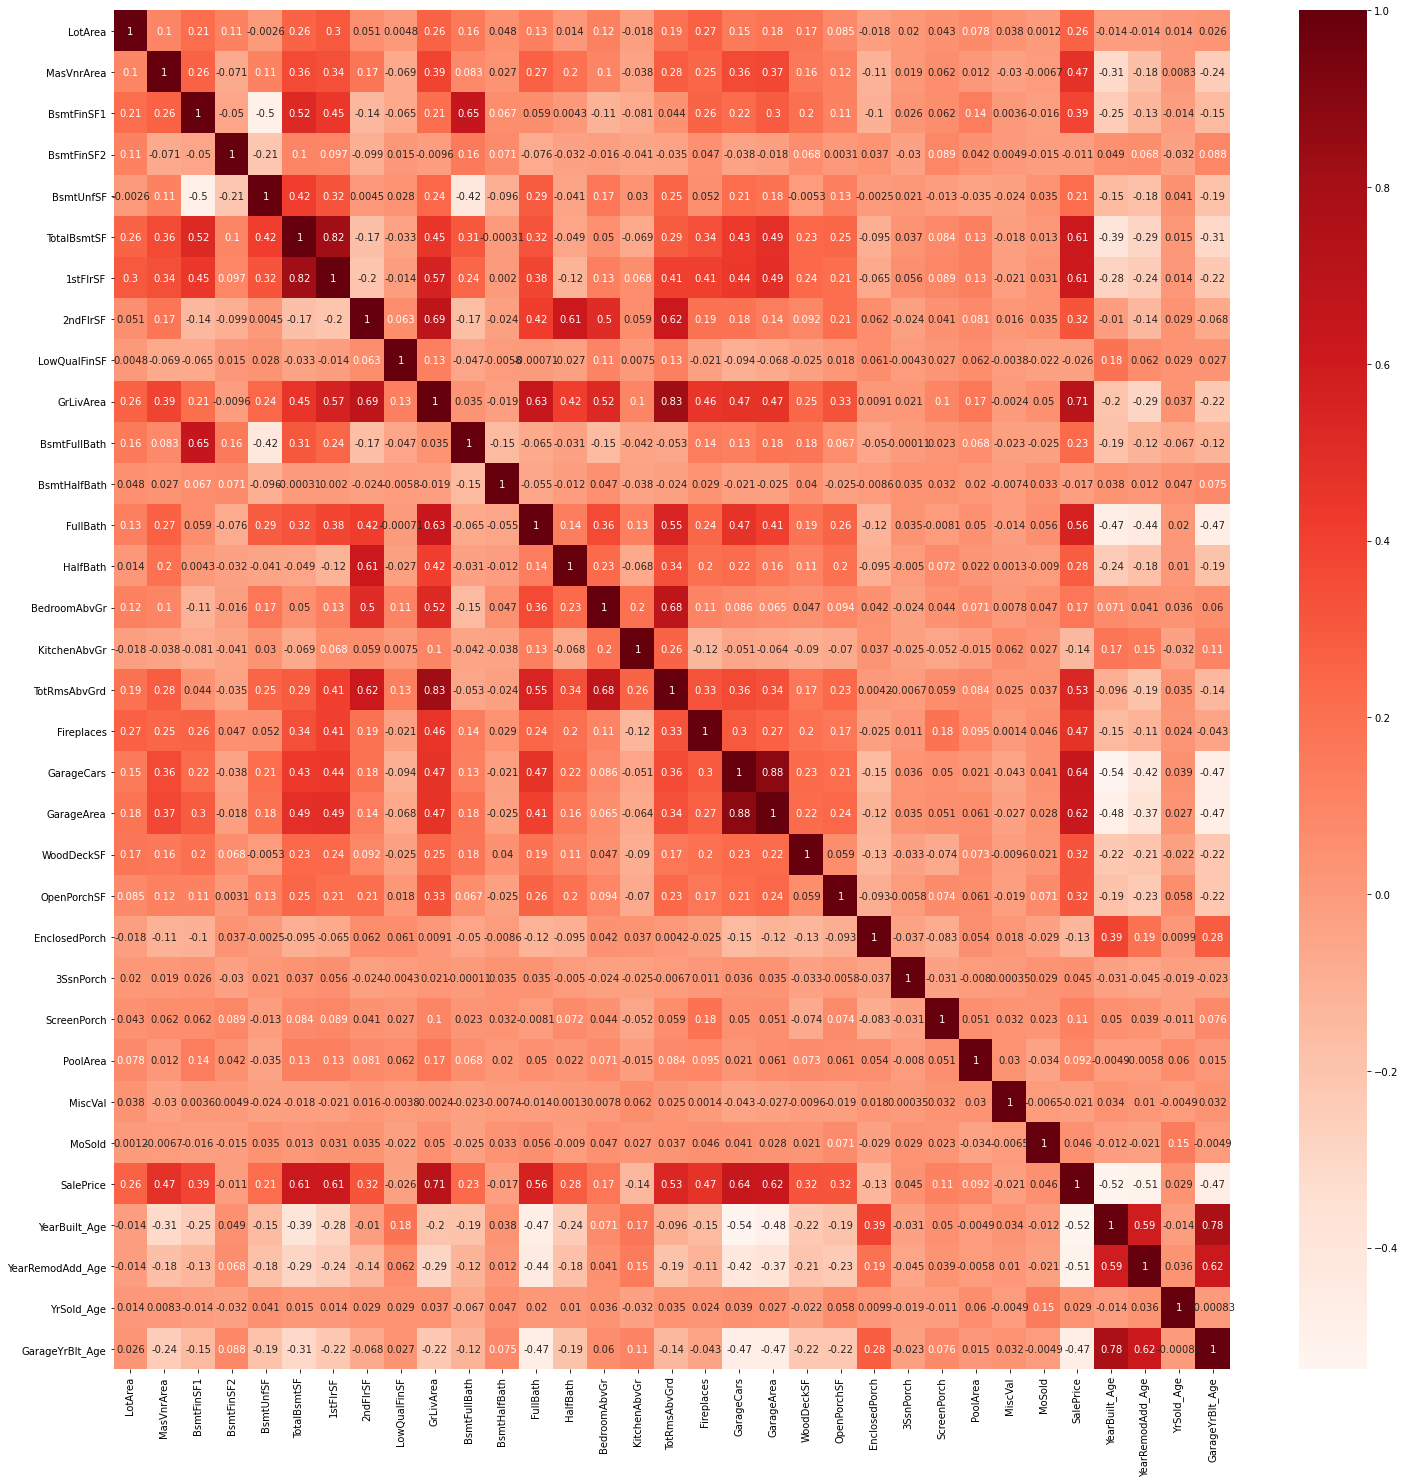

In [31]:
# Correlation 

plt.figure(figsize=(25,25))
sb.heatmap(data_v1.corr(),cmap="Reds",annot=True)

# Significant Variables

In [32]:
sig_val = data_v1[list(data_v1.dtypes[data_v1.dtypes != 'object'].index)].corr()
SigcorrDF = sig_val[sig_val['SalePrice'] > 0.5]['SalePrice'].sort_values(ascending=False)
print(SigcorrDF[1:])
SigcorrDFCols = [i for i in SigcorrDF.index]

GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
Name: SalePrice, dtype: float64


In [33]:
data_v1.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,YearBuilt_Age,YearRemodAdd_Age,YrSold_Age,GarageYrBlt_Age
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,2,WD,Normal,208500,7,7,2,7.0
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,5,WD,Normal,181500,34,34,3,34.0
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,9,WD,Normal,223500,9,8,2,9.0
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,0,0,2,WD,Abnorml,140000,95,40,4,12.0
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,12,WD,Normal,250000,10,10,2,10.0


In [34]:
# Removing columns which have more than 85% of unique values since it will not add value 
dropcol = []
value = len(data_v1.index)*.85
for i in data_v1.columns:
    if data_v1[i].value_counts().max()>= value:
        data_v1.drop(columns=[i], inplace=True)
        dropcol.append(i)
print('No of Columns removed : ' , len(dropcol))
print('List of Columns removed : ' , dropcol)

No of Columns removed :  27
List of Columns removed :  ['Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'BsmtFinSF2', 'Heating', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SaleType']


# Data Cleaning - Outlier Analysis

In [35]:
data_v1.describe()

,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,SalePrice,YearBuilt_Age,YearRemodAdd_Age,YrSold_Age,GarageYrBlt_Age
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,103.117123,443.639726,567.240411,1057.429452,1162.626712,346.992466,1515.463699,0.425342,1.565068,...,1.767123,472.980137,94.244521,46.660274,6.321918,180921.195890,38.732192,25.134247,2.184247,31.410959
std,9981.264932,180.731373,456.098091,441.866955,438.705324,386.587738,436.528436,525.480383,0.518911,0.550916,...,0.747315,213.804841,125.338794,66.256028,2.703626,79442.502883,30.202904,20.645407,1.328095,23.997022
min,1300.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,34900.000000,0.000000,0.000000,0.000000,0.000000
25%,7553.500000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,1129.500000,0.000000,1.000000,...,1.000000,334.500000,0.000000,0.000000,5.000000,129975.000000,10.000000,6.000000,1.000000,9.000000
50%,9478.500000,0.000000,383.500000,477.500000,991.500000,1087.000000,0.000000,1464.000000,0.000000,2.000000,...,2.000000,480.000000,0.000000,25.000000,6.000000,163000.000000,37.000000,16.000000,2.000000,30.000000
75%,11601.500000,164.250000,712.250000,808.000000,1298.250000,1391.250000,728.000000,1776.750000,1.000000,2.000000,...,2.000000,576.000000,168.000000,68.000000,8.000000,214000.000000,56.000000,43.000000,3.000000,48.000000
max,215245.000000,1600.000000,5644.000000,2336.000000,6110.000000,4692.000000,2065.000000,5642.000000,3.000000,3.000000,...,4.000000,1418.000000,857.000000,547.000000,12.000000,755000.000000,138.000000,60.000000,4.000000,110.000000


In [36]:
#Data Cleaning - OutlierAnalysis

# Treating outliers for Area anad SF columns


# Leaving BsmtFullBath since we have very less data and categorize values as : 0,1,2,3
# Leaving BedroomAbvGr since we have very less data  and categorize values as : 0,1,2,3
# Leaving FullBath since we have very less data and categorize values between : 0 to 8
# Leaving TotRmsAbvGrd since we have very less data and categorize values between : 0 to 14
# Leaving Fireplaces since we have very less data and categorize values between : 0 to 3
# Leaving GarageCars since we have very less data and categorize values between : 0 to 4
# Leaving SalesPrice will treat it differently as it is a target column

outliers = []
out_summary = []
out_cols = ['LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF',
            '2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF']

print("Before outliers treatment\n\n",data_v1[out_cols].describe())


#Outliers columns identification 

for i in out_cols:
    Q3,Q1 = np.percentile(data_v1[i],[75,25])
    IQR = Q3-Q1
    lower_bound = Q1-1.5*IQR
    upper_bound = Q3+1.5*IQR

    if ((data_v1[i].min() < lower_bound) or (data_v1[i].max() > upper_bound)):
        out_summary.append("attribute \"{}\" with min value : {} -> max value : {} -> IQR {} -> lower_bound : {} match is {} -> upper_bound : {} match is {}".format(i,data_v1[i].min(),data_v1[i].max(),IQR,Q1-1.5*IQR,(data_v1[i].min() < lower_bound),Q3+1.5*IQR,data_v1[i].max() > upper_bound))
        outliers.append(i)

# List of outliers satisfying lower or upper bound        
for i in range(0,len(out_summary)):
    print("\nOutlier column with stats : \n\n{}\n".format(out_summary[i]))
    
#Outliers Treatment

for i in outliers:
    Q3,Q1 = np.percentile(data_v1[i],[75,25])
    IQR = Q3-Q1
    lower_bound = Q1-1.5*IQR
    upper_bound = Q3+1.5*IQR
    data_v1[i][data_v1[i]<=lower_bound] = lower_bound
    data_v1[i][data_v1[i]>=upper_bound] = upper_bound


print("After outliers treatment\n\n",data_v1[out_cols].describe())

Before outliers treatment

              LotArea   MasVnrArea   BsmtFinSF1    BsmtUnfSF  TotalBsmtSF  \
count    1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean    10516.828082   103.117123   443.639726   567.240411  1057.429452   
std      9981.264932   180.731373   456.098091   441.866955   438.705324   
min      1300.000000     0.000000     0.000000     0.000000     0.000000   
25%      7553.500000     0.000000     0.000000   223.000000   795.750000   
50%      9478.500000     0.000000   383.500000   477.500000   991.500000   
75%     11601.500000   164.250000   712.250000   808.000000  1298.250000   
max    215245.000000  1600.000000  5644.000000  2336.000000  6110.000000   

          1stFlrSF     2ndFlrSF    GrLivArea   GarageArea   WoodDeckSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1162.626712   346.992466  1515.463699   472.980137    94.244521   
std     386.587738   436.528436   525.480383   213.804841   125.3

In [37]:
data_v1.shape

(1460, 47)

# Target Columns Analysis - SalePrice

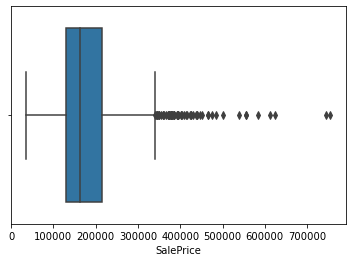

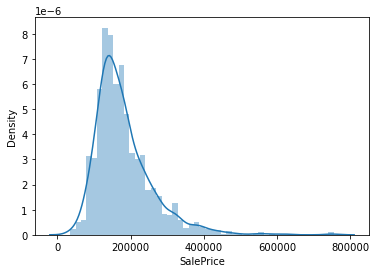

After Transformation


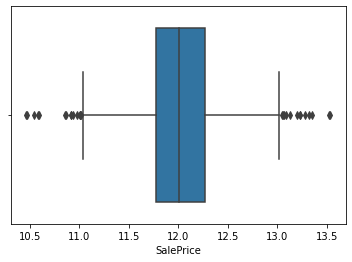

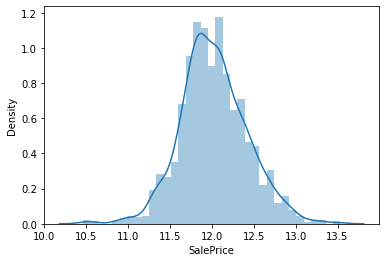

In [38]:
# Sale Price is Right Skewed
sb.boxplot(data_v1['SalePrice'])
plt.show()
sb.distplot(data_v1['SalePrice'])
plt.show()

# Transforming SalesPrice column data is normally distributed

data_v1['SalePrice'] = np.log1p(data_v1['SalePrice'])

print("After Transformation")
# Sales Price is Right Skewed
sb.boxplot(data_v1['SalePrice'])
plt.show()
sb.distplot(data_v1['SalePrice'])
plt.show()

In [39]:
print ("Rows     : " ,data_v1.shape[0])
print ("Columns  : " ,data_v1.shape[1])
print ("\nFeatures : \n" ,data_v1.columns.tolist())
print ("\nMissing values :  ", data_v1.isnull().sum().values.sum())
print ("\nPercentage of rows deleted : {}%  ".format(round(100-100*len(data_v1.index)/len(data_v1.index),2)))

Rows     :  1460
Columns  :  47

Features : 
 ['MSSubClass', 'MSZoning', 'LotArea', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'SaleCondition', 'SalePrice', 'YearBuilt_Age', 'YearRemodAdd_Age', 'YrSold_Age', 'GarageYrBlt_Age']

Missing values :   0

Percentage of rows deleted : 0.0%  


# Visualizations - Univariate , Bivariate , Multivariate

In [40]:
cat = []
con = []
for i in data_v1:
    if data_v1[i].dtype == 'object':
        cat.append(i)
    else:
        con.append(i)
        
print("Continuous columns\n",con)
print("\nCategorical Columns",cat)

Continuous columns
 ['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'SalePrice', 'YearBuilt_Age', 'YearRemodAdd_Age', 'YrSold_Age', 'GarageYrBlt_Age']

Categorical Columns ['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'GarageType', 'GarageFinish', 'SaleCondition']


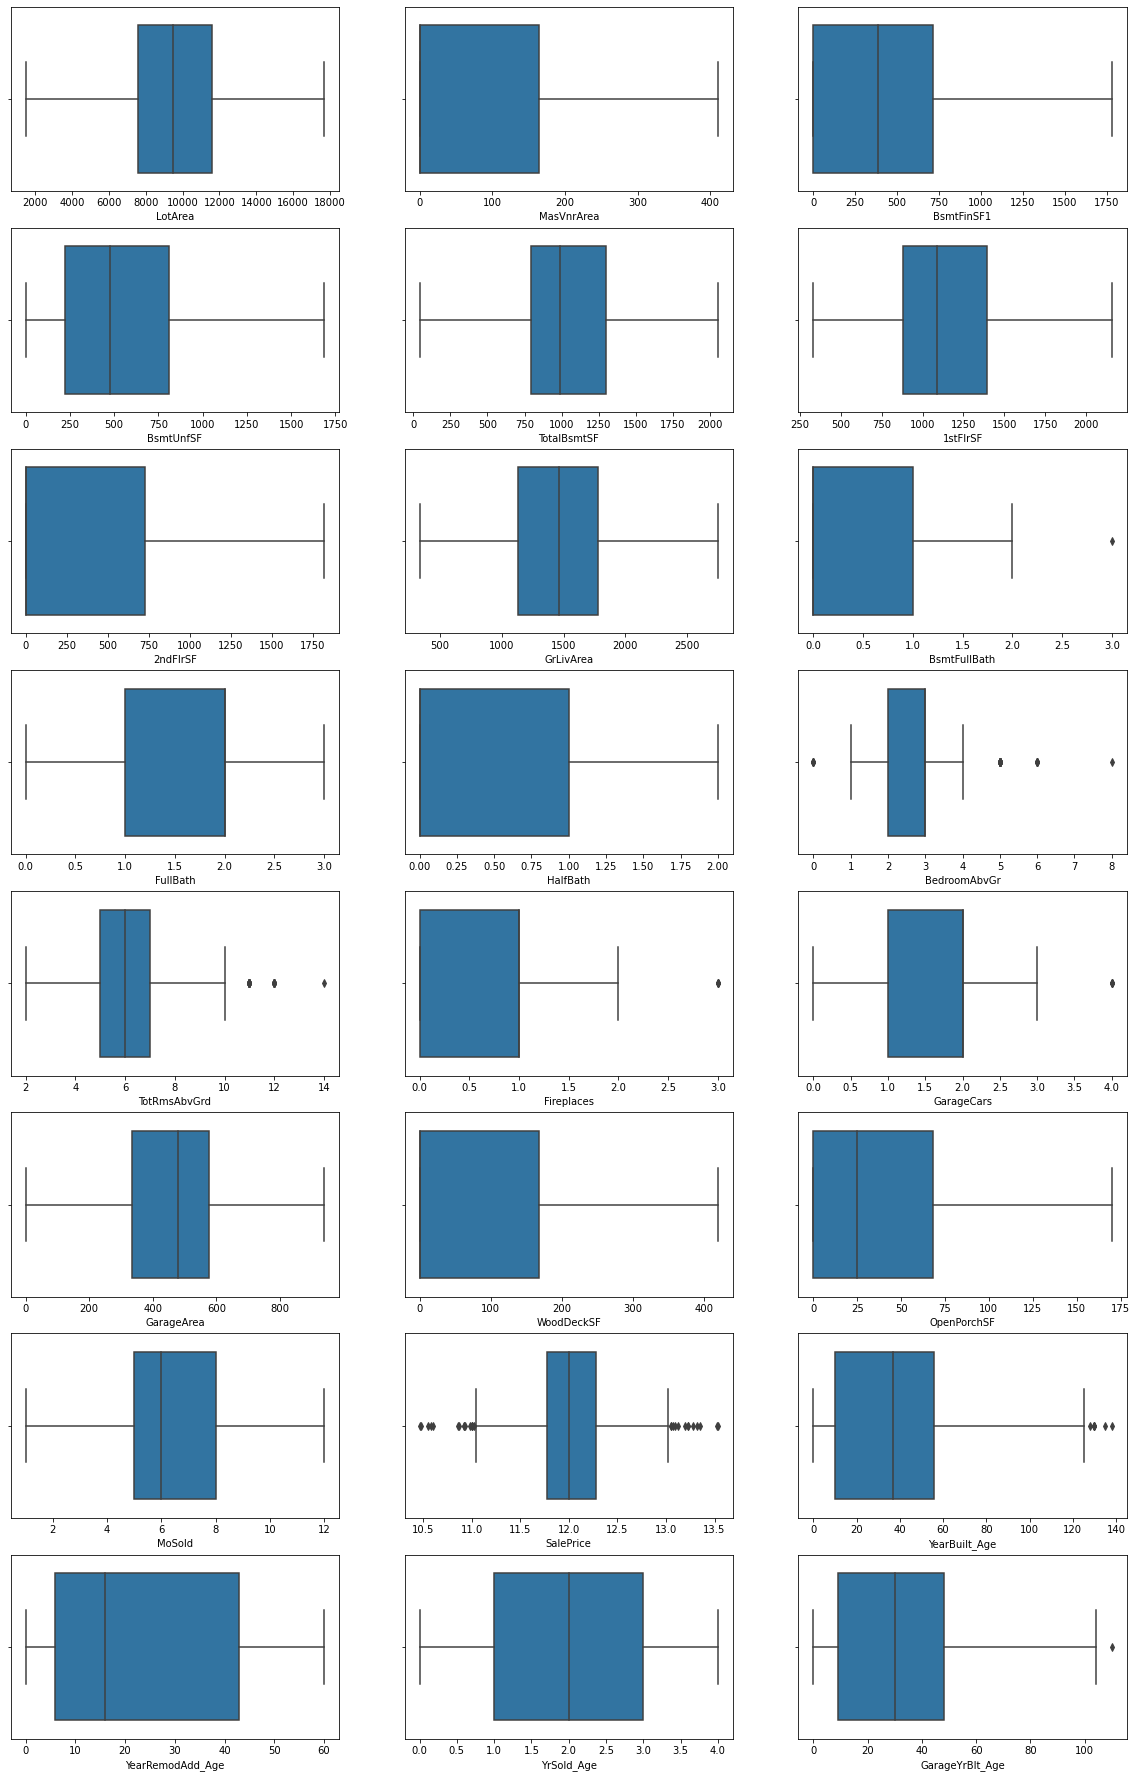

In [41]:
#Univariate Analysis Continuous variables
plt.figure(figsize=(20,40))
for i in enumerate(con):
    plt.subplot(10,3,i[0]+1)
    sb.boxplot(x=i[1], data=data_v1)

## Inference
We can see there are no outliers and all the variables are in good shape. Some of the columns have ordered categorical data and since the data is less have not treated them 

- BsmtFullBath since we have very less data and categorize values as : 0,1,2,3
- BedroomAbvGr since we have very less data  and categorize values as : 0,1,2,3
- FullBath since we have very less data and categorize values between : 0 to 8
- TotRmsAbvGrd since we have very less data and categorize values between : 0 to 14
- Fireplaces since we have very less data and categorize values between : 0 to 3
- SalesPrice will treat it differently as it is a target column

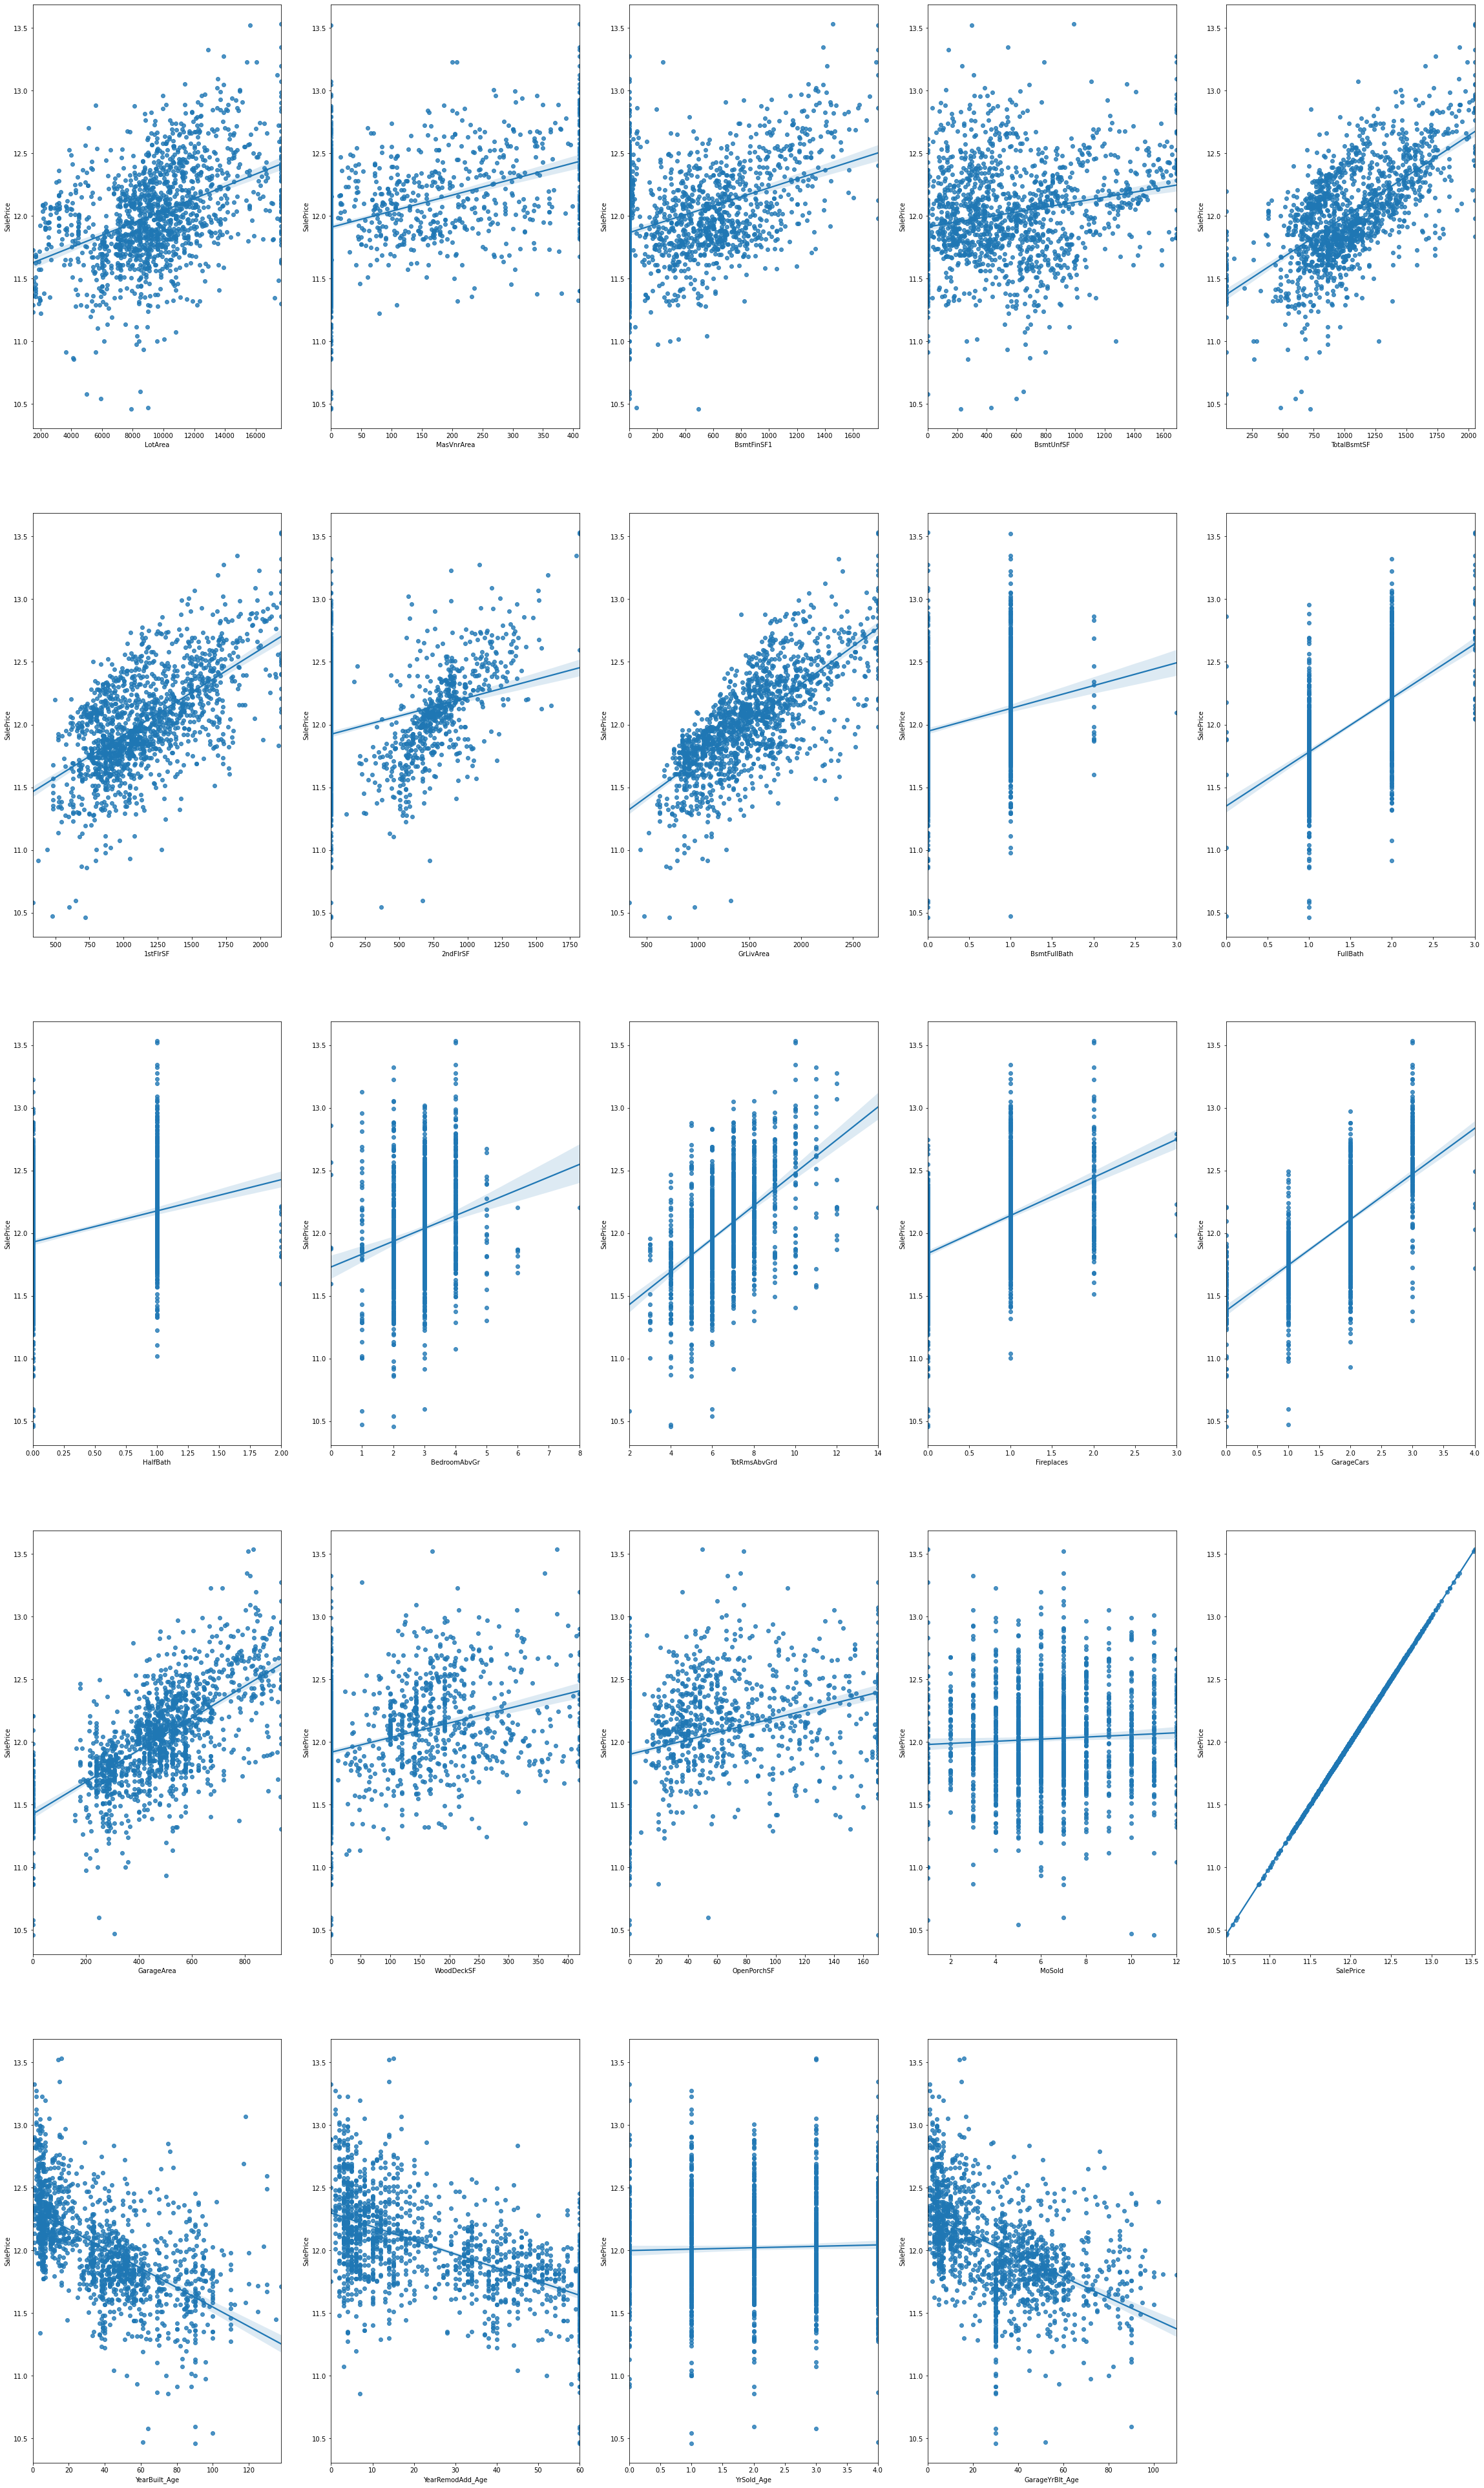

In [42]:
#Bivariate Analysis Continuous columns
# Plotting regplot for each numerical column against our target variable which is SalePrice
cols = 5
rows = len(con)//5 + 1
plt.figure(figsize=(40, 70))
for i, name in enumerate(con):
    plt.subplot(rows, cols, i+1)
    sb.regplot(data_v1[name], data_v1.SalePrice )

## Inference 

All the continuous colums are related to the SalePrice YearbuiltAge,YearRemodel_Age and garageYRBT_Age have negative correlation

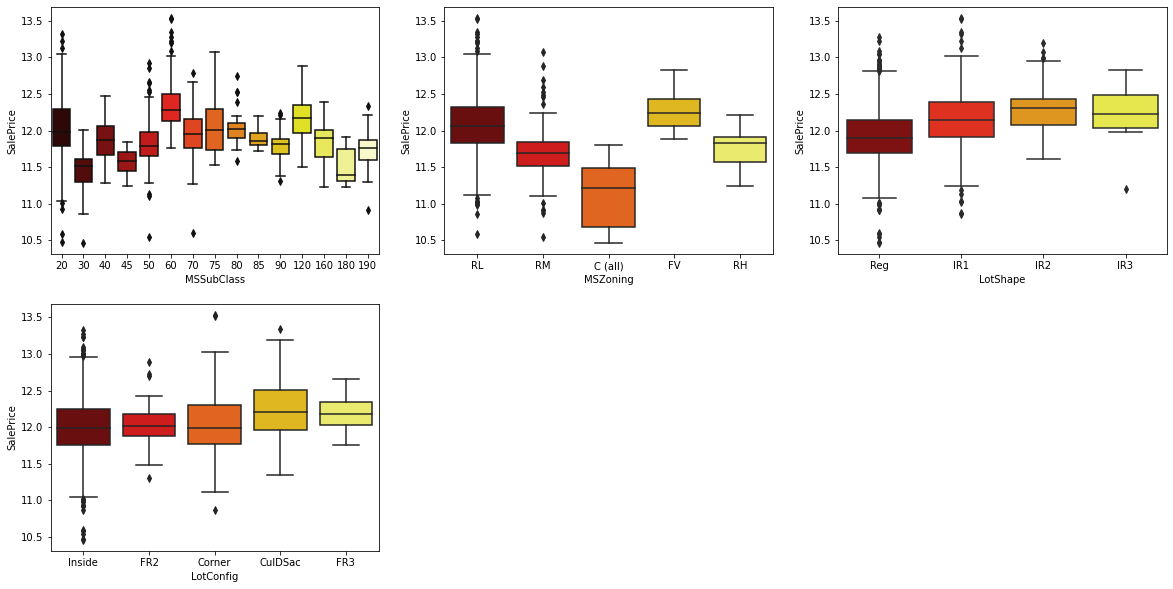

In [43]:
# Bivariate Analysis Categorical Columns
plt.figure(figsize = (20,10))
for i, col in enumerate(cat[0:4]):
    plt.subplot(2,3,i+1)
    sb.boxplot(x = col, y ='SalePrice', data = data_v1,palette="hot")
plt.show()

#Observations
# We can observe high no of SalePrice for MSSubClass 80  and then 120 
# MSZoning Floating Village Residential have highesst no of SalePrice

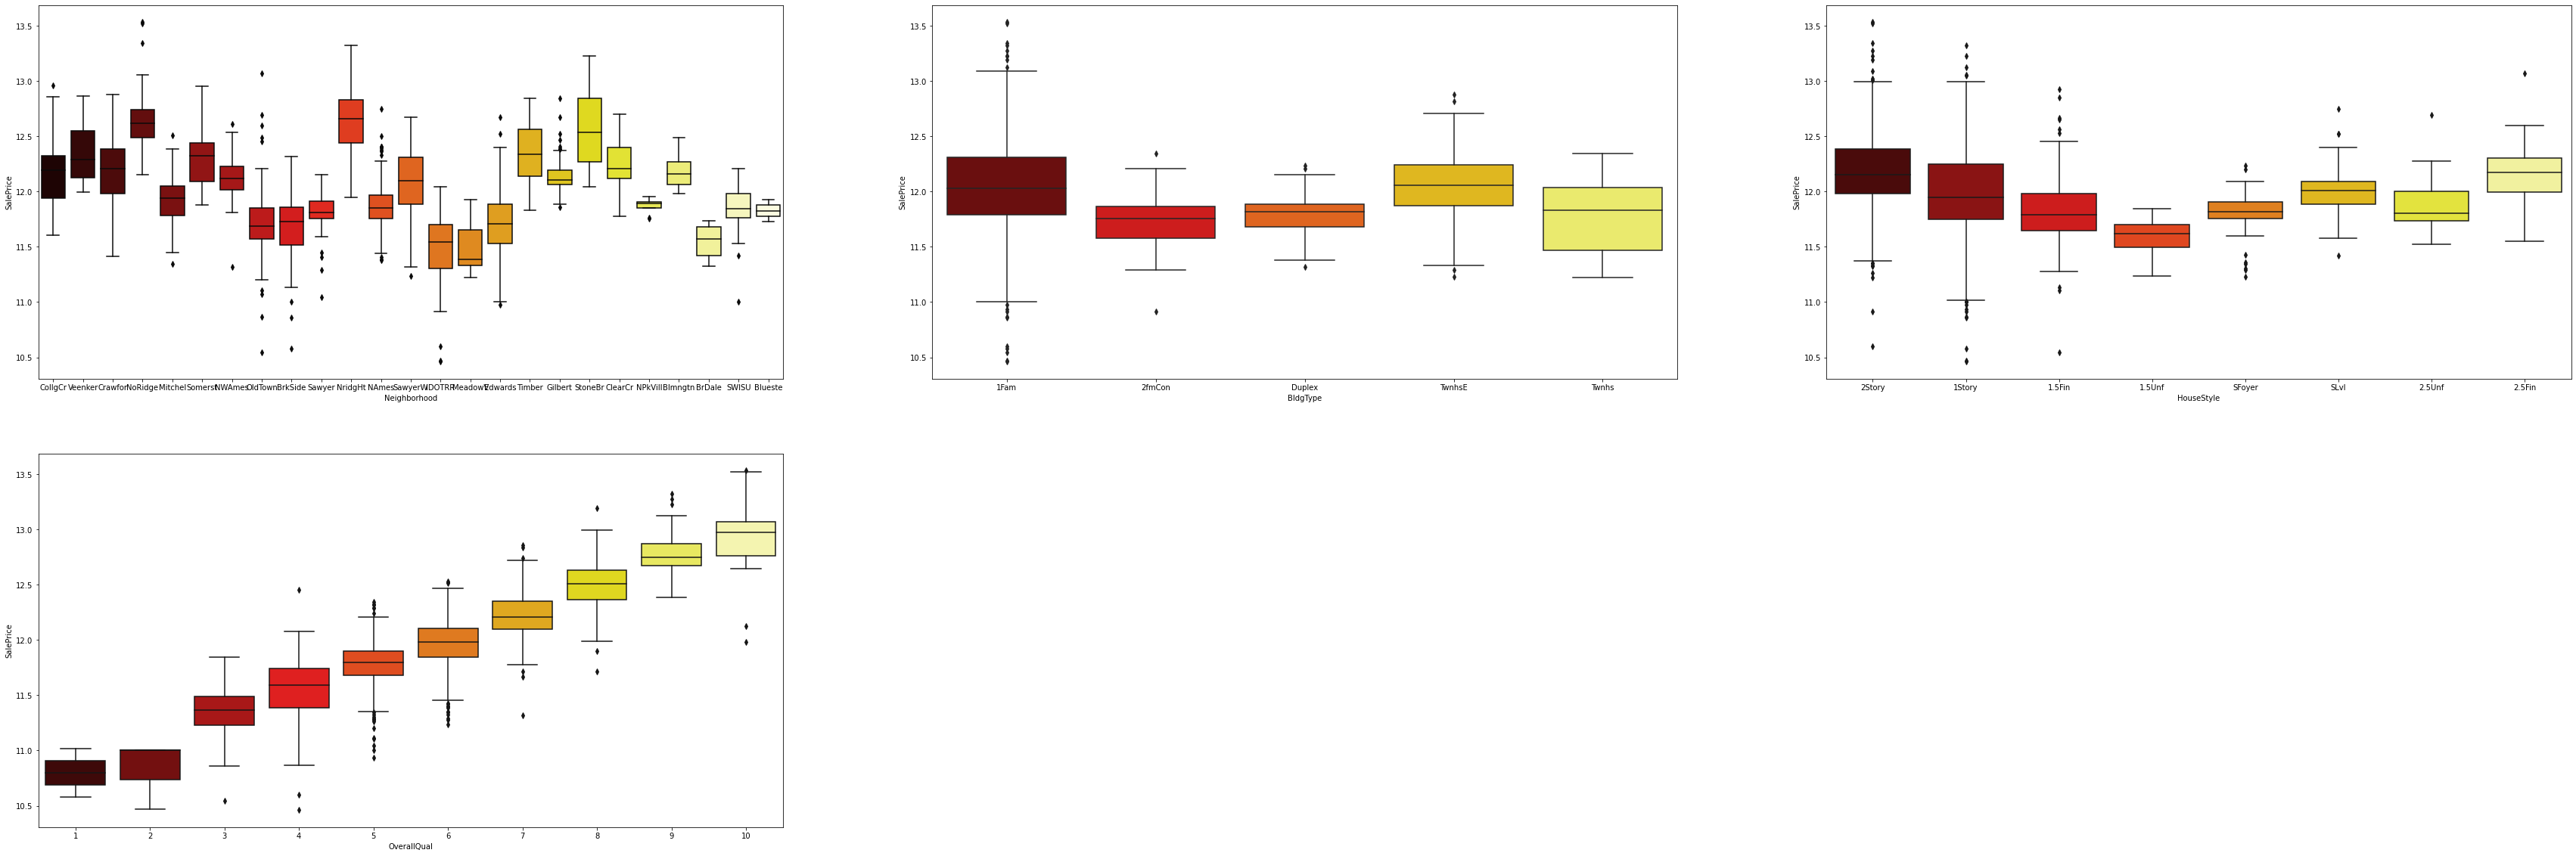

In [44]:
# Bivariate Analysis Categorical Columns
plt.figure(figsize = (60,20))
for i, col in enumerate(cat[4:8]):
    plt.subplot(2,3,i+1)
    sb.boxplot(x = col, y ='SalePrice', data = data_v1,palette="hot")
plt.show()

#2Story and 1Story buildings have highes no of SalePrice
# withe the increase in overallquality saleprice will increase
#Neighborhood_Nridght have highest SalePrice
# Building type TwinSE and IFam have highest no of SalePrice

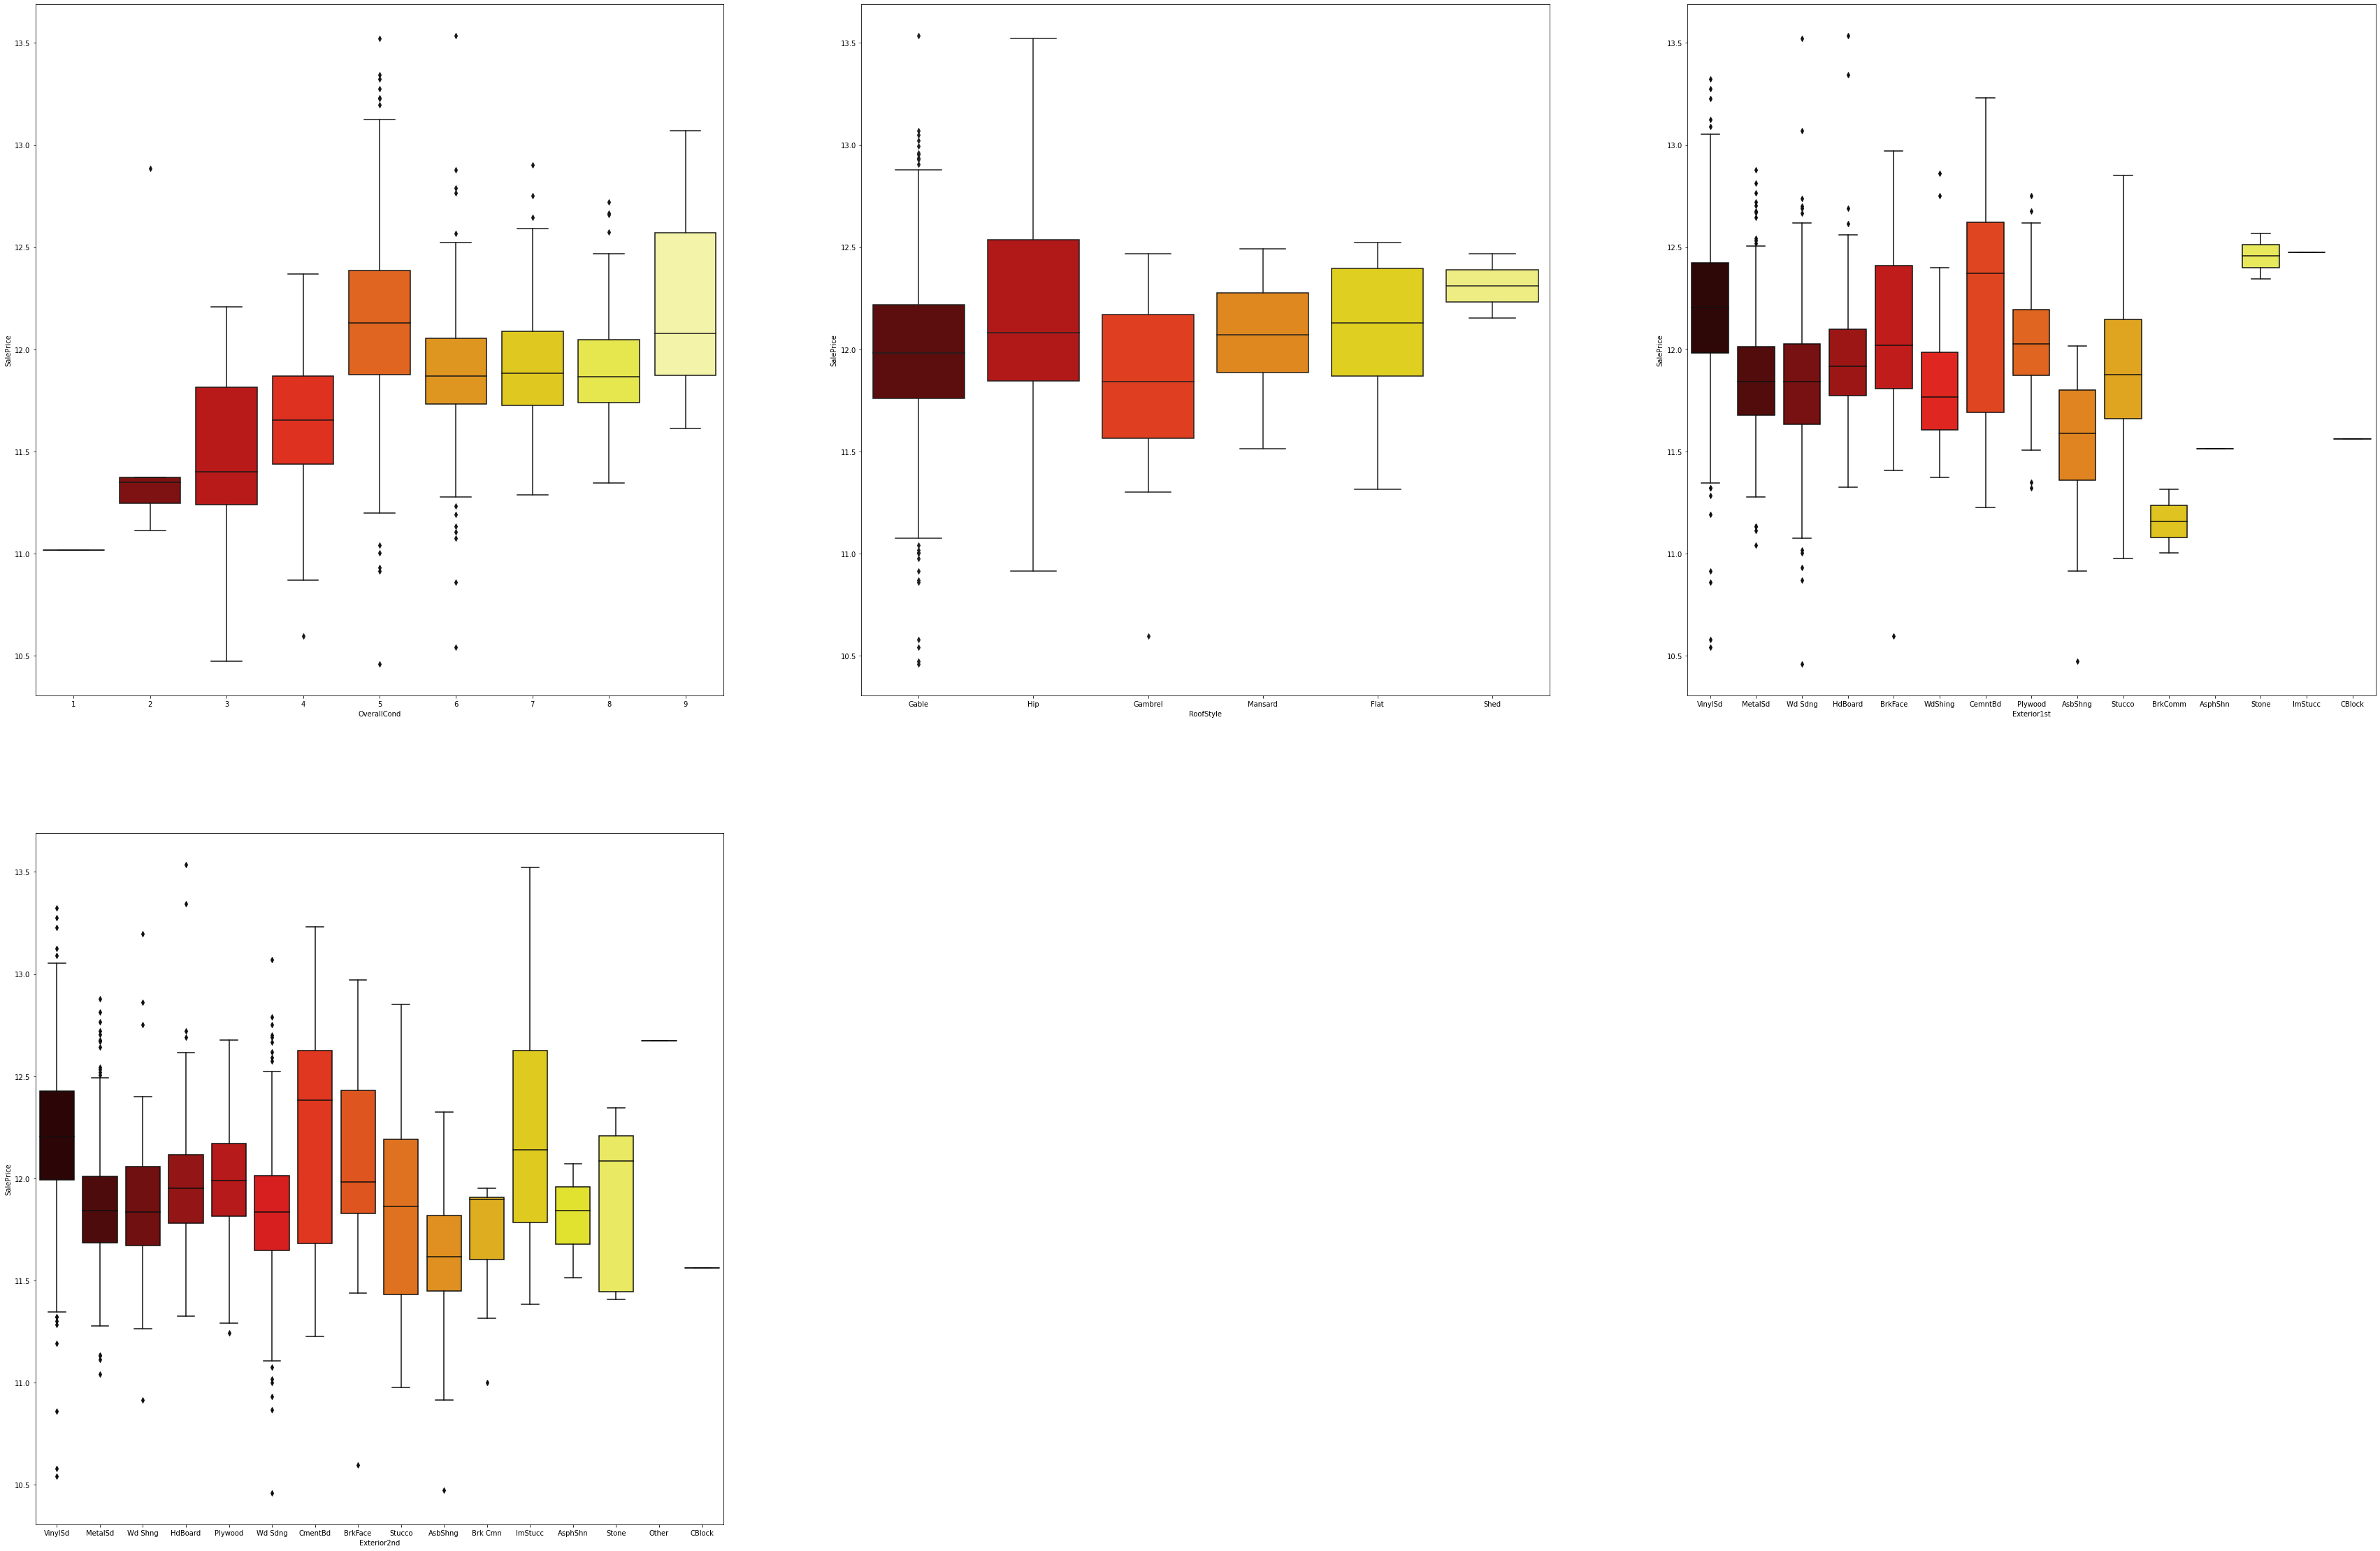

In [45]:
# Bivariate Analysis Categorical Columns
plt.figure(figsize = (60,40))
for i, col in enumerate(cat[8:12]):
    plt.subplot(2,3,i+1)
    sb.boxplot(x = col, y ='SalePrice', data = data_v1,palette="hot")
plt.show()

# With the increase in overallcond SalePrice will increase
# RoofStyle hip have highest no of SalePrice
# External Centralboard have highest sale price following BrkFace

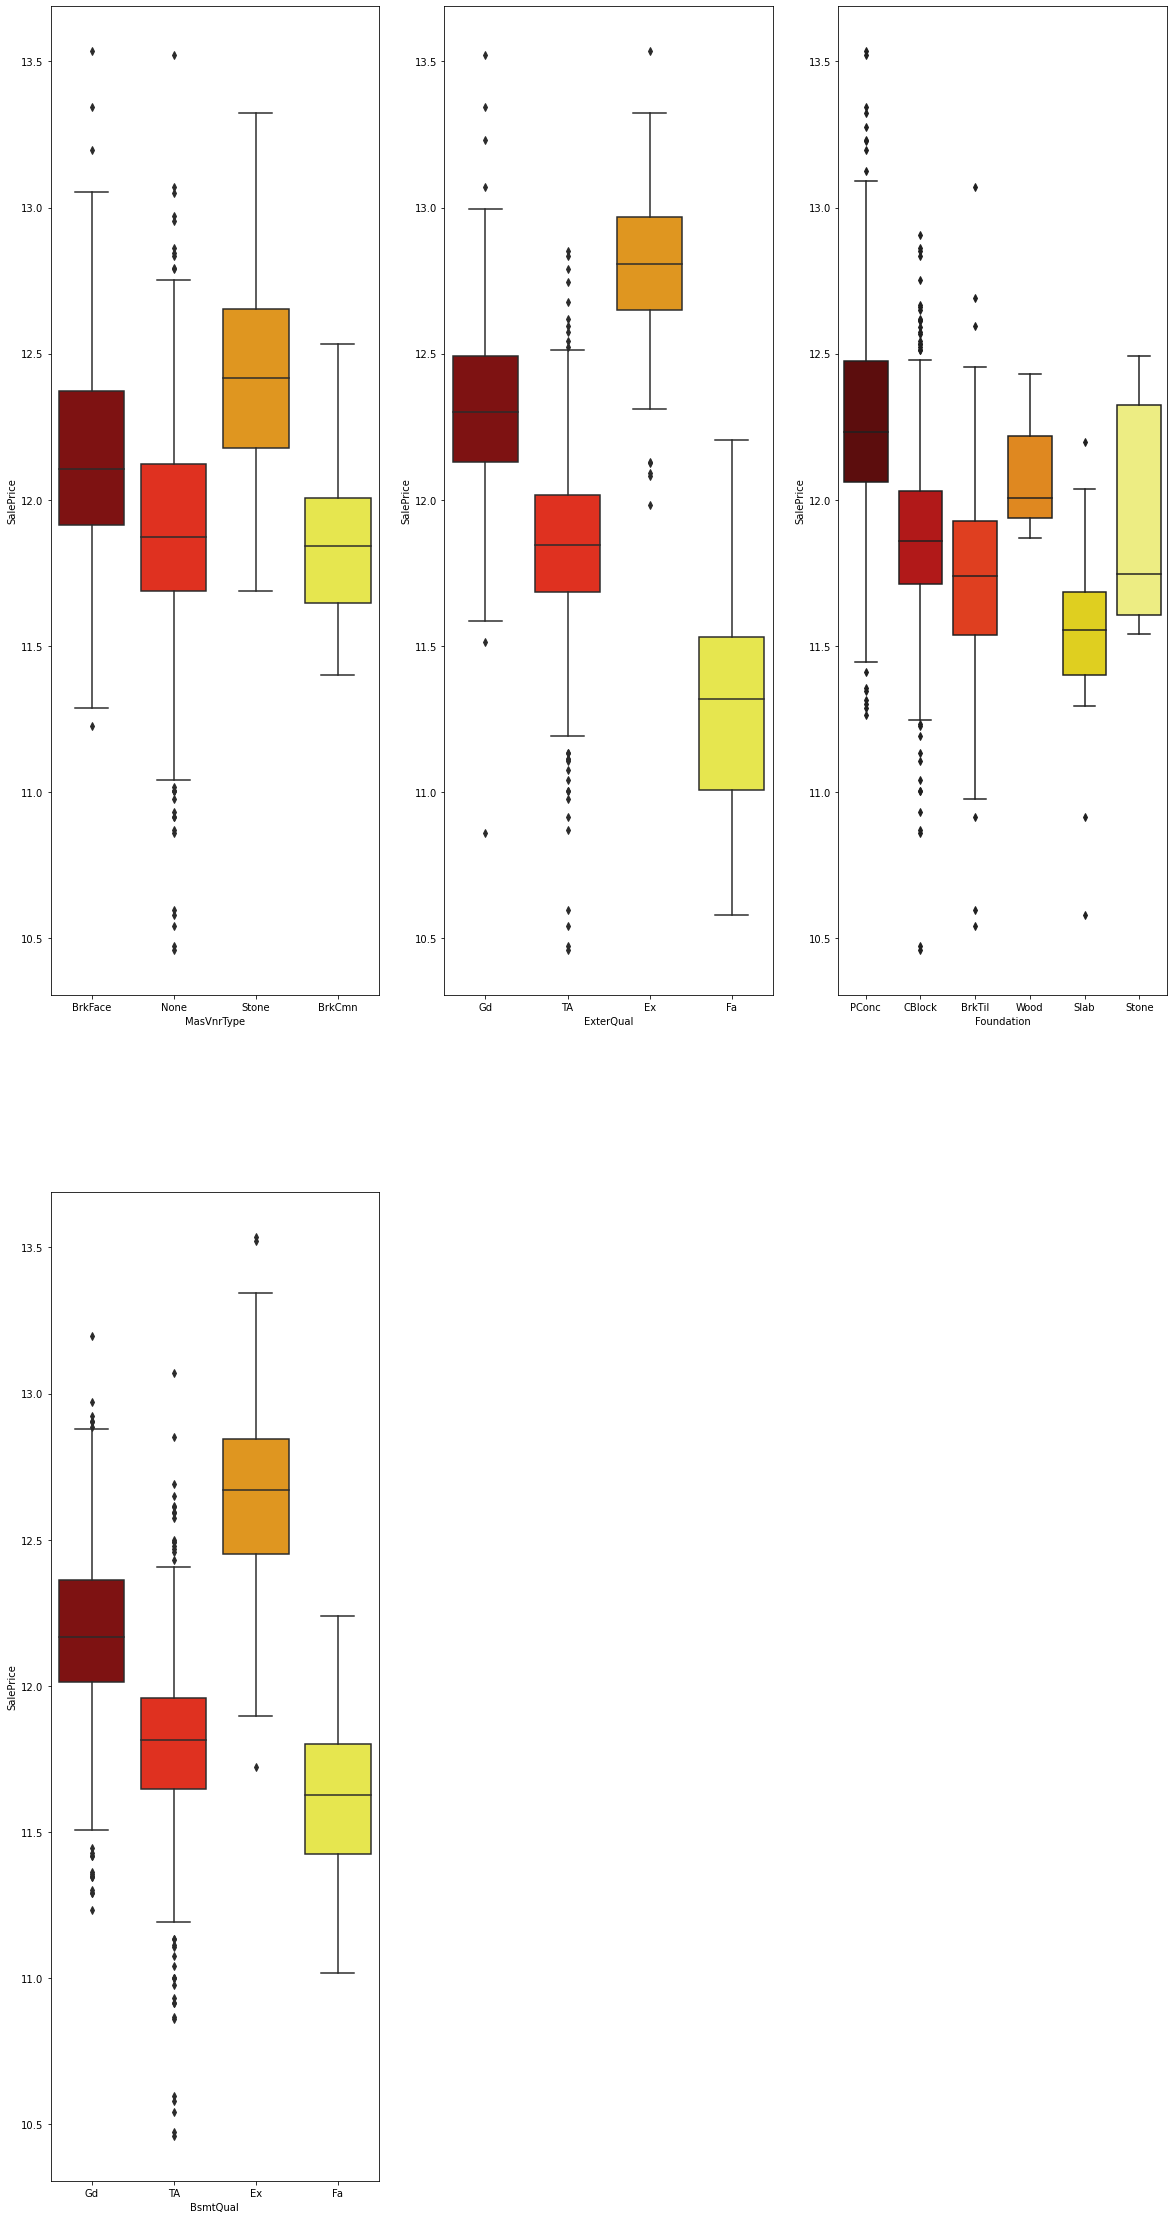

In [46]:
# Bivariate Analysis Categorical Columns
plt.figure(figsize = (20,40))
for i, col in enumerate(cat[12:16]):
    plt.subplot(2,3,i+1)
    sb.boxplot(x = col, y ='SalePrice', data = data_v1,palette="hot")
plt.show()

#ExternalQuality Excellent have highest SalePrice
#BasementQuality have highest SalePrice

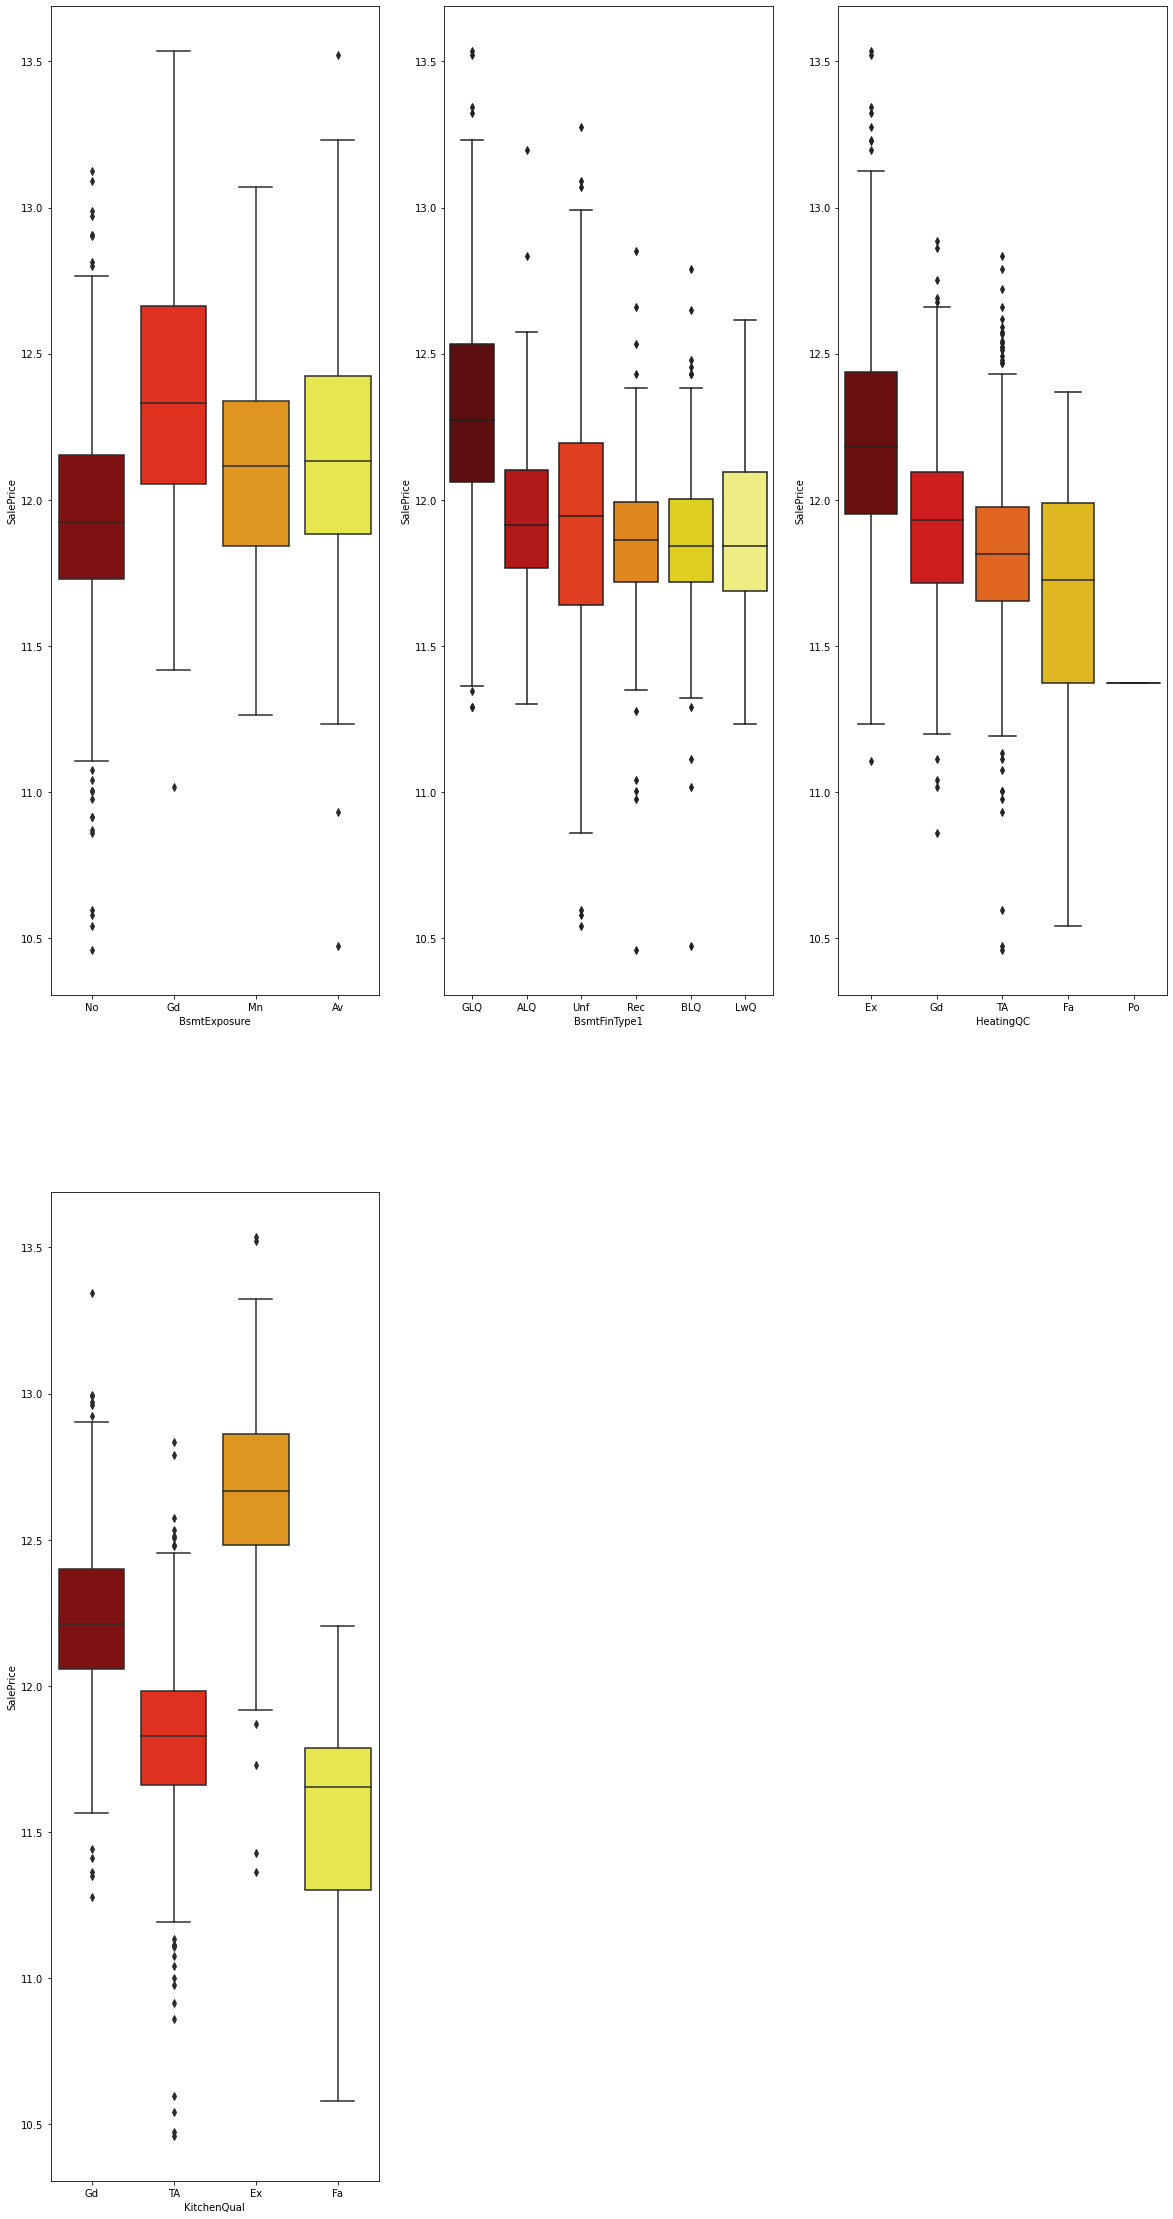

In [47]:
# Bivariate Analysis Categorical Columns
plt.figure(figsize = (20,40))
for i, col in enumerate(cat[16:20]):
    plt.subplot(2,3,i+1)
    sb.boxplot(x = col, y ='SalePrice', data = data_v1,palette="hot")
plt.show()

#House with execellent Kitchenquality & HeatingQC have HighestSaleprice

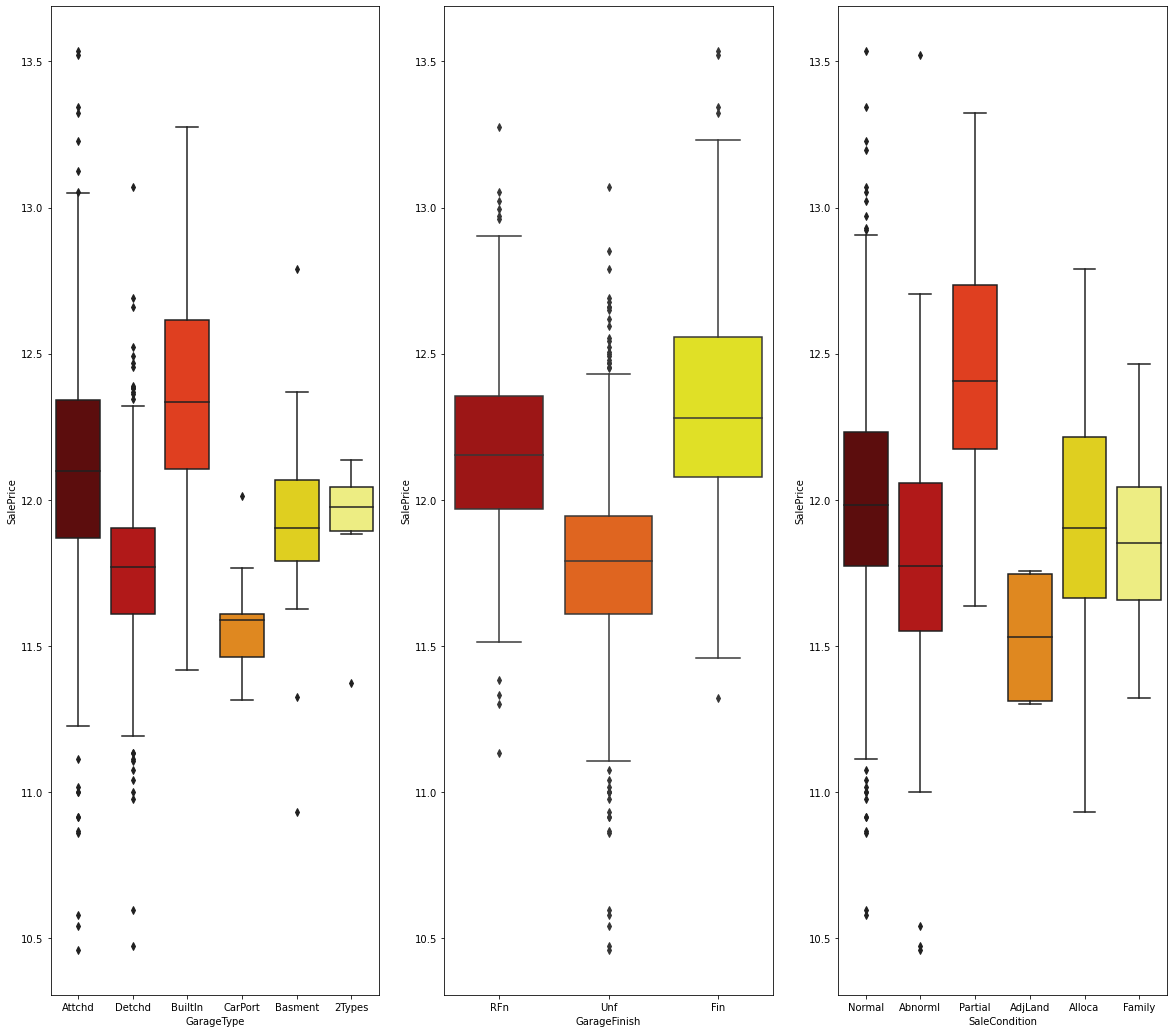

In [48]:
# Bivariate Analysis Categorical Columns
plt.figure(figsize = (20,40))
for i, col in enumerate(cat[20:24]):
    plt.subplot(2,3,i+1)
    sb.boxplot(x = col, y ='SalePrice', data = data_v1,palette="hot")
plt.show()

# House with BuildtinGarageType and Finishes Garage Work have highest SalePrice

# Inferences



- House with execellent Kitchenquality & HeatingQC have HighestSaleprice
- House with BuildtinGarageType and Finishes Garage Work have highest SalePrice
- We can observe high no of SalePrice for MSSubClass 80  and then 120 
- MSZoning Floating Village Residential have highesst no of SalePrice
- Houses with Excellent ExternalQuality Excellent have highest SalePrice
- Houses with Excellent BasementQuality have highest SalePrice
- With the increase in overallcond SalePrice will increase
- Houses with RoofStyle hip have highest no of SalePrice
- Houses with External Centralboard have highest sale price following BrkFace
- Houses with 2Story and 1Story buildings have highes no of SalePrice
- with the increase in overallquality saleprice will increase
- Neighborhood_Nridght have highest SalePrice
- Building type townhouseend unit and Single Family Detached have highest no of SalePrice

# Multivariate Analysis

In [49]:
# Below are the list of highly correlated predictors with SalePrice
sig_val = data_v1[list(data_v1.dtypes[data_v1.dtypes != 'object'].index)].corr()
SigcorrDF = sig_val[sig_val['SalePrice'] > 0.5]['SalePrice'].sort_values(ascending=False)
print(SigcorrDF[1:])
SigcorrDFCols = [i for i in SigcorrDF.index]

GrLivArea       0.722437
GarageCars      0.680625
GarageArea      0.661249
TotalBsmtSF     0.644791
1stFlrSF        0.617833
FullBath        0.594771
TotRmsAbvGrd    0.534422
Name: SalePrice, dtype: float64


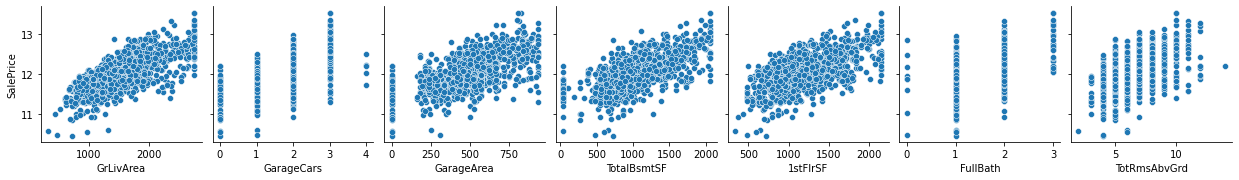

In [50]:
sb.pairplot(data_v1,x_vars=SigcorrDFCols[1:],y_vars=SigcorrDFCols[0])

<AxesSubplot:>

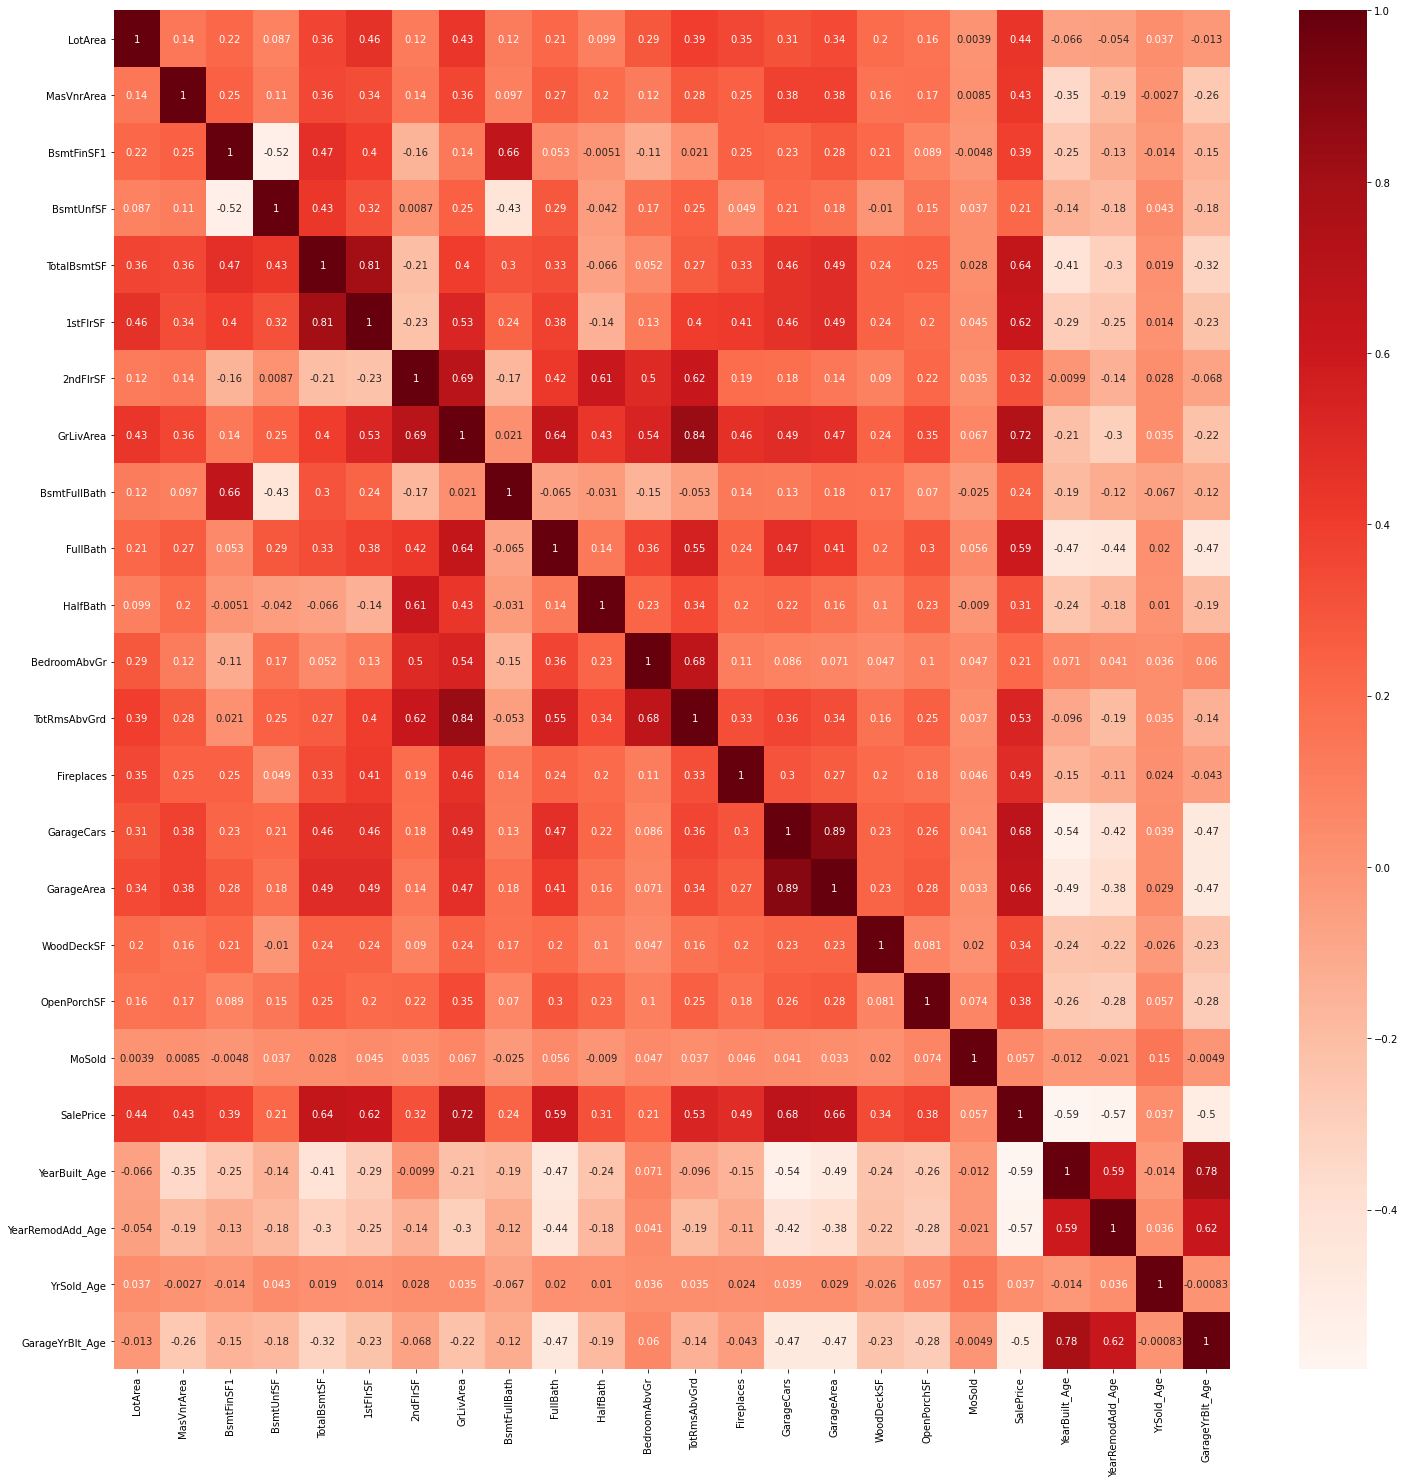

In [51]:
# Correlation 

plt.figure(figsize=(25,25))
sb.heatmap(data_v1.corr(),cmap="Reds",annot=True)

# Data Preprocessing

In [52]:
### Changing datatype of OverallQual and OverallCond

data_v1.OverallQual = data_v1.OverallQual.astype(float)
data_v1.OverallCond = data_v1.OverallCond.astype(float)

In [53]:
# map MSSubClass values to its categorical name
data_v1["MSSubClass"] = data_v1["MSSubClass"].map({20:"subclass1", 30:"subclass2", 40:"subclass3", 45:"subclass4",
                                                   50:"subclass5", 60:"subclass6", 70:"subclass7", 75:"subclass8",
                                                   80:"subclass9", 85:"subclass10", 90:"subclass11", 120:"subclass12",
                                                   150:"subclass13", 160:"subclass14", 180:"subclass15", 190:"subclass16"})

In [54]:
#Encoding Categorical Variables
# List of Categorical Variables
print(cat)
print(len(cat))

['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'GarageType', 'GarageFinish', 'SaleCondition']
23


In [55]:
# Ordinal categorical variable using LabelEncoder

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

cat_col_list = ['ExterQual', 'BsmtQual','BsmtExposure', 
                'BsmtFinType1', 'HeatingQC','KitchenQual', 
                'GarageFinish', 'LotShape']

data_v1[cat_col_list] = data_v1[cat_col_list].apply(le.fit_transform)

data_v1[cat_col_list].head(5)

,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,GarageFinish,LotShape
0,2,2,3,2,0,2,1,3
1,3,2,1,0,0,3,1,3
2,2,2,2,2,0,2,1,0
3,3,3,3,0,2,2,2,0
4,2,2,0,2,0,2,1,0


In [56]:
# Non Ordered Categorical variable using one hot encoding dummy variable

pd.set_option('display.max_columns', None)

cat_list = ['MSSubClass', 'MSZoning','LotConfig','Neighborhood', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType','Foundation','GarageType','SaleCondition']

for i in cat_list:
    data_v1 = pd.get_dummies(data=data_v1,columns=[i],drop_first=True)

data_v1.head()

,LotArea,LotShape,OverallQual,OverallCond,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,SalePrice,YearBuilt_Age,YearRemodAdd_Age,YrSold_Age,GarageYrBlt_Age,MSSubClass_subclass10,MSSubClass_subclass11,MSSubClass_subclass12,MSSubClass_subclass14,MSSubClass_subclass15,MSSubClass_subclass16,MSSubClass_subclass2,MSSubClass_subclass3,MSSubClass_subclass4,MSSubClass_subclass5,MSSubClass_subclass6,MSSubClass_subclass7,MSSubClass_subclass8,MSSubClass_subclass9,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,8450.0,3,7.0,5.0,196.0,2,2,3,2,706.0,150.0,856,0,856.0,854,1710.0,1,2,1,3,2,8,0,1,2,548.0,0,61,2,12.247699,7,7,2,7.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
1,9600.0,3,6.0,8.0,0.0,3,2,1,0,978.0,284.0,1262,0,1262.0,0,1262.0,0,2,0,3,3,6,1,1,2,460.0,298,0,5,12.109016,34,34,3,34.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,11250.0,0,7.0,5.0,162.0,2,2,2,2,486.0,434.0,920,0,920.0,866,1786.0,1,2,1,3,2,6,1,1,2,608.0,0,42,9,12.317171,9,8,2,9.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
3,9550.0,0,7.0,5.0,0.0,3,3,3,0,216.0,540.0,756,2,961.0,756,1717.0,1,1,0,3,2,7,1,2,3,642.0,0,35,2,11.849405,95,40,4,12.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,14260.0,0,8.0,5.0,350.0,2,2,0,2,655.0,490.0,1145,0,1145.0,1053,2198.0,1,2,1,4,2,9,1,1,3,836.0,192,84,12,12.429220,10,10,2,10.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0

In [57]:
data_v1.shape

del cat , con

## Spliting the data

In [58]:
# Model building

# Spliting data to train and test split set

df_train, df_test = train_test_split(data_v1, train_size=.7, random_state=100)

# Feature Scaling

In [59]:
# Using the standard scaling to bring all the columns on same scale

#Scaling the values

scaled_list = ['LotArea','LotShape','OverallQual','OverallCond','MasVnrArea','ExterQual','BsmtQual',
              'BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','HeatingQC','1stFlrSF',
              '2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','YearBuilt_Age','YearRemodAdd_Age',
              'YrSold_Age','GarageYrBlt_Age']

scaler = StandardScaler()

df_train[scaled_list] = scaler.fit_transform(df_train[scaled_list])
df_test[scaled_list] = scaler.transform(df_test[scaled_list])

df_train.head()

,LotArea,LotShape,OverallQual,OverallCond,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,SalePrice,YearBuilt_Age,YearRemodAdd_Age,YrSold_Age,GarageYrBlt_Age,MSSubClass_subclass10,MSSubClass_subclass11,MSSubClass_subclass12,MSSubClass_subclass14,MSSubClass_subclass15,MSSubClass_subclass16,MSSubClass_subclass2,MSSubClass_subclass3,MSSubClass_subclass4,MSSubClass_subclass5,MSSubClass_subclass6,MSSubClass_subclass7,MSSubClass_subclass8,MSSubClass_subclass9,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
318,0.079963,0.74876,0.648310,-0.532073,1.238391,-0.785464,-0.316792,-1.086173,-0.416850,1.251373,-0.457055,0.724859,-0.862909,0.572240,2.143465,2.393081,1,2,1,4,2,9,1,1,3,0.905544,2.151689,0.320903,4,12.468441,-0.715324,-0.389207,-0.882411,-0.590876,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
239,-0.243507,0.74876,-0.066511,-1.448170,-0.662880,0.664732,0.830175,0.650683,0.131608,-0.804614,0.184537,-0.781427,1.434432,-0.989637,0.796243,-0.036040,0,1,1,3,3,7,1,2,1,-1.215156,-0.778856,1.836535,4,11.635152,0.868511,1.698692,-1.629460,1.247132,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
986,-1.201080,0.74876,-0.066511,2.216221,-0.662880,0.664732,0.830175,0.650683,1.228525,-1.021034,-0.171649,-1.396740,0.285761,-0.437266,0.669581,0.274150,0,1,0,2,2,5,0,2,1,-1.044916,2.617129,-0.815821,6,11.669938,2.023391,-0.874765,1.358737,1.205359,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1416,0.481859,0.74876,-1.496155,0.384025,-0.662880,0.664732,0.830175,0.650683,1.228525,-1.021034,0.495058,-0.678055,0.285761,0.22938

## Spliting data to xtrain,xtest,ytrain,ytest

In [60]:
ytrain = df_train.pop('SalePrice')
xtrain = df_train
ytest  = df_test.pop('SalePrice')
xtest  = df_test

In [61]:
#Implementing the Model using Linear Regression , RFE , CrossValidation & VIF

folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

param_value = [{'n_features_to_select': list(range(0,161, 10))}]

lm = LinearRegression()
lm.fit(xtrain, ytrain)
rfe = RFE(lm)             

model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = param_value, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# fit the model
model_cv.fit(xtrain, ytrain)  

Fitting 5 folds for each of 17 candidates, totalling 85 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [0, 10, 20, 30, 40, 50, 60,
                                                   70, 80, 90, 100, 110, 120,
                                                   130, 140, 150, 160]}],
             return_train_score=True, scoring='r2', verbose=1)

In [62]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.loc[:, ['param_n_features_to_select', 'mean_test_score', 'mean_train_score']]

# We can see that with the increase in no of features mean train and test score is getting negative lets try to build the model till n_feature < 50 since after that mean_test and train score becomes negative

,param_n_features_to_select,mean_test_score,mean_train_score
0,0,NaN,NaN
1,10,7.436179e-01,0.770908
2,20,8.249654e-01,0.853214
3,30,8.404823e-01,0.876398
4,40,8.722537e-01,0.909433
5,50,8.789038e-01,0.916423
6,60,-4.528754e+23,0.917837
7,70,-8.368959e+22,0.924941
8,80,-6.356036e+20,0.917026
9,90,-1.207018e+22,0.927403


In [63]:
# Function to select top n features
def get_features(n):
    lm = LinearRegression()
    lm.fit(xtrain, ytrain)
    rfe = RFE(lm,n)
    rfe = rfe.fit(xtrain,ytrain)
    top_n_features = xtrain.columns[rfe.support_]
    return top_n_features

In [64]:

# We can see that with the increase in no of features mean train and test score is getting negative lets try to build the model till n_feature < 50 since after that mean_test and train score becomes negative

n_estimator_10 = get_features(10)
n_estimator_20 = get_features(20)
n_estimator_30 = get_features(30)
n_estimator_40 = get_features(40)
n_estimator_50 = get_features(50)
n_estimator_60 = get_features(60)

In [65]:
# Function to return the OLS model input parameter will be the DataFrame

def ols_model(df_ytrain,df_xtrain_rfe):
    """
    # Input parameter wll be the training dataset and output will be the ols model
    # we need to add constant to the xtrain and before fitting to OLS
    """
    df_xtrain_sm = stats.add_constant(df_xtrain_rfe)
    lm = stats.OLS(df_ytrain,df_xtrain_sm)
    model = lm.fit()
    return model,df_xtrain_sm

# Function to return the Varince Inflation Factor 

def variance_inflation(df_xtrain):
    """
    # Input parameter will be the training dataset and the output will be the vif data frame
    """
    vif = pd.DataFrame()
    vif['features'] = df_xtrain.columns
    vif['VIF'] = [variance_inflation_factor(df_xtrain.values,i) for i in range(df_xtrain.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by="VIF",ascending=False)
    return vif

## Manual Elimination order

"""
High pvalue , high VIF - remove first
High pvalue , low VIF - remove second
Low  pvalue , high VIF - removed third
"""

'\nHigh pvalue , high VIF - remove first\nHigh pvalue , low VIF - remove second\nLow  pvalue , high VIF - removed third\n'

In [66]:
#Initial model created model with n_estimator_10
model1,df_xtrain_sm1 = ols_model(ytrain,xtrain[n_estimator_10])
vif = variance_inflation(xtrain[n_estimator_10])
print(model1.summary())
print("\n Variance Inflation Factor \n",vif)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     422.7
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:04:14   Log-Likelihood:                 336.22
No. Observations:                1021   AIC:                            -650.4
Df Residuals:                    1010   BIC:                            -596.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    11.51

In [67]:
#Initial model created model with n_estimator_20
model1,df_xtrain_sm1 = ols_model(ytrain,xtrain[n_estimator_20])
vif = variance_inflation(xtrain[n_estimator_20])
print(model1.summary())
print("\n Variance Inflation Factor \n",vif)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     350.7
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:04:14   Log-Likelihood:                 535.16
No. Observations:                1021   AIC:                            -1030.
Df Residuals:                    1001   BIC:                            -931.7
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    11.52

In [68]:
#Initial model created model with n_estimator_30
model1,df_xtrain_sm1 = ols_model(ytrain,xtrain[n_estimator_30])
vif = variance_inflation(xtrain[n_estimator_30])
print(model1.summary())
print("\n Variance Inflation Factor \n",vif)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     337.6
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:04:14   Log-Likelihood:                 714.55
No. Observations:                1021   AIC:                            -1369.
Df Residuals:                     991   BIC:                            -1221.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    11.50

In [69]:
#Initial model created model with n_estimator_40
model1,df_xtrain_sm1 = ols_model(ytrain,xtrain[n_estimator_40])
vif = variance_inflation(xtrain[n_estimator_40])
print(model1.summary())
print("\n Variance Inflation Factor \n",vif)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     254.2
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:04:14   Log-Likelihood:                 724.93
No. Observations:                1021   AIC:                            -1370.
Df Residuals:                     981   BIC:                            -1173.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    11.50

In [70]:
#Initial model created model with n_estimator_50
model1,df_xtrain_sm1 = ols_model(ytrain,xtrain[n_estimator_50])
vif = variance_inflation(xtrain[n_estimator_50])
print(model1.summary())
print("\n Variance Inflation Factor \n",vif)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     223.3
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:04:14   Log-Likelihood:                 765.79
No. Observations:                1021   AIC:                            -1434.
Df Residuals:                     972   BIC:                            -1192.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    11.50

In [71]:
#Initial model created model with n_estimator_60
model1,df_xtrain_sm1 = ols_model(ytrain,xtrain[n_estimator_60])
vif = variance_inflation(xtrain[n_estimator_60])
print(model1.summary())
print("\n Variance Inflation Factor \n",vif)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     206.2
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:04:15   Log-Likelihood:                 795.50
No. Observations:                1021   AIC:                            -1479.
Df Residuals:                     965   BIC:                            -1203.
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    11.53

In [72]:
# Optimal no of estimators seems to be 30 lets build the model considering this and remove columns based on VIF and p values
#Initial model created model with n_estimator_30
model1,df_xtrain_sm1 = ols_model(ytrain,xtrain[n_estimator_30])
vif = variance_inflation(xtrain[n_estimator_30])
print(model1.summary())
print("\n Variance Inflation Factor \n",vif)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     337.6
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:04:15   Log-Likelihood:                 714.55
No. Observations:                1021   AIC:                            -1369.
Df Residuals:                     991   BIC:                            -1221.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    11.50

In [73]:
# Removed High Pvalue : Exterior1st_Stone

n_estimator_30_new =  ['OverallQual', 'OverallCond', 'BsmtFinSF1', 'TotalBsmtSF', 'GrLivArea',
       'GarageCars', 'YearBuilt_Age',
       'MSSubClass_subclass14', 'MSSubClass_subclass2', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_NWAmes',
       'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Veenker', 'BldgType_Duplex', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Exterior1st_Stucco',
       'Exterior2nd_Stucco', 'Foundation_Stone', 'Foundation_Wood','MSSubClass_subclass11']

model1,df_xtrain_sm1 = ols_model(ytrain,xtrain[n_estimator_30_new])
vif = variance_inflation(xtrain[n_estimator_30_new])
print(model1.summary())
print("\n Variance Inflation Factor \n",vif)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     354.7
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:04:15   Log-Likelihood:                 720.71
No. Observations:                1021   AIC:                            -1383.
Df Residuals:                     992   BIC:                            -1240.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    11.51

In [74]:
# Removed High Pvalue : Foundation_Stone

n_estimator_30_new =  ['OverallQual', 'OverallCond', 'BsmtFinSF1', 'TotalBsmtSF', 'GrLivArea',
       'GarageCars', 'YearBuilt_Age',
       'MSSubClass_subclass14', 'MSSubClass_subclass2', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_NWAmes',
       'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Veenker', 'BldgType_Duplex', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Exterior1st_Stucco',
       'Exterior2nd_Stucco', 'Foundation_Wood','MSSubClass_subclass11']

model1,df_xtrain_sm1 = ols_model(ytrain,xtrain[n_estimator_30_new])
vif = variance_inflation(xtrain[n_estimator_30_new])
print(model1.summary())
print("\n Variance Inflation Factor \n",vif)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     368.0
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:04:15   Log-Likelihood:                 720.35
No. Observations:                1021   AIC:                            -1385.
Df Residuals:                     993   BIC:                            -1247.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    11.51

In [75]:
# Removed High Pvalue : Exterior1st_Stucco

n_estimator_30_new =  ['OverallQual', 'OverallCond', 'BsmtFinSF1', 'TotalBsmtSF', 'GrLivArea',
       'GarageCars', 'YearBuilt_Age',
       'MSSubClass_subclass14', 'MSSubClass_subclass2', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_NWAmes',
       'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Veenker', 'BldgType_Duplex', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace',
       'Exterior2nd_Stucco', 'Foundation_Wood','MSSubClass_subclass11']

model1,df_xtrain_sm1 = ols_model(ytrain,xtrain[n_estimator_30_new])
vif = variance_inflation(xtrain[n_estimator_30_new])
print(model1.summary())
print("\n Variance Inflation Factor \n",vif)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     382.1
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:04:15   Log-Likelihood:                 719.82
No. Observations:                1021   AIC:                            -1386.
Df Residuals:                     994   BIC:                            -1253.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    11.51

In [76]:
# Removed High Pvalue : Exterior2st_Stucco

n_estimator_30_new =  ['OverallQual', 'OverallCond', 'BsmtFinSF1', 'TotalBsmtSF', 'GrLivArea',
       'GarageCars', 'YearBuilt_Age',
       'MSSubClass_subclass14', 'MSSubClass_subclass2', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_NWAmes',
       'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Veenker', 'BldgType_Duplex', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace','Foundation_Wood','MSSubClass_subclass11']

model1,df_xtrain_sm1 = ols_model(ytrain,xtrain[n_estimator_30_new])
vif = variance_inflation(xtrain[n_estimator_30_new])
print(model1.summary())
print("\n Variance Inflation Factor \n",vif)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     397.0
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:04:15   Log-Likelihood:                 718.98
No. Observations:                1021   AIC:                            -1386.
Df Residuals:                     995   BIC:                            -1258.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    11.52

In [77]:
# Removed High Pvalue : Foundation_Wood

n_estimator_30_new =  ['OverallQual', 'OverallCond', 'BsmtFinSF1', 'TotalBsmtSF', 'GrLivArea',
       'GarageCars', 'YearBuilt_Age',
       'MSSubClass_subclass14', 'MSSubClass_subclass2', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_NWAmes',
       'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Veenker', 'BldgType_Duplex', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace','MSSubClass_subclass11']

model1,df_xtrain_sm1 = ols_model(ytrain,xtrain[n_estimator_30_new])
vif = variance_inflation(xtrain[n_estimator_30_new])
print(model1.summary())
print("\n Variance Inflation Factor \n",vif)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     413.3
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:04:15   Log-Likelihood:                 718.21
No. Observations:                1021   AIC:                            -1386.
Df Residuals:                     996   BIC:                            -1263.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    11.52

In [78]:
# Removed High VIF : MSSubClass_subclass11

n_estimator_30_new =  ['OverallQual', 'OverallCond', 'BsmtFinSF1', 'TotalBsmtSF', 'GrLivArea',
       'GarageCars', 'YearBuilt_Age',
       'MSSubClass_subclass14', 'MSSubClass_subclass2', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_NWAmes',
       'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Veenker', 'BldgType_Duplex', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace']

model1,df_xtrain_sm1 = ols_model(ytrain,xtrain[n_estimator_30_new])
vif = variance_inflation(xtrain[n_estimator_30_new])
print(model1.summary())
print("\n Variance Inflation Factor \n",vif)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     413.3
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:04:15   Log-Likelihood:                 718.21
No. Observations:                1021   AIC:                            -1386.
Df Residuals:                     996   BIC:                            -1263.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    11.52

In [79]:
# Removed High VIF : GarageCars

n_estimator_30_new =  ['OverallQual', 'OverallCond', 'BsmtFinSF1', 'TotalBsmtSF', 'GrLivArea', 'YearBuilt_Age',
       'MSSubClass_subclass14', 'MSSubClass_subclass2', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_NWAmes',
       'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Veenker', 'BldgType_Duplex', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace']

model1,df_xtrain_sm1 = ols_model(ytrain,xtrain[n_estimator_30_new])
vif = variance_inflation(xtrain[n_estimator_30_new])
print(model1.summary())
print("\n Variance Inflation Factor \n",vif)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     394.1
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:04:15   Log-Likelihood:                 676.14
No. Observations:                1021   AIC:                            -1304.
Df Residuals:                     997   BIC:                            -1186.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    11.63

In [80]:
# Optimal no of Features Identified after the Linear Regression model are 
"""
['OverallQual', 'OverallCond', 'BsmtFinSF1', 'TotalBsmtSF', 'GrLivArea', 'YearBuilt_Age',
       'MSSubClass_subclass14', 'MSSubClass_subclass2', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_NWAmes',
       'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Veenker', 'BldgType_Duplex', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace']
"""
xtrain_sm = stats.add_constant(xtrain[n_estimator_30_new])
ytrain_pred = pd.DataFrame(model1.predict(xtrain_sm),columns=["SalePrice"])
xtest_sm = stats.add_constant(xtest[n_estimator_30_new])
ytest_pred = pd.DataFrame(model1.predict(xtest_sm),columns=["SalePrice"])

lrmodel = LinearRegression()
lrmodel.fit(xtrain[n_estimator_30_new],ytrain)
ylr_pred = lrmodel.predict(xtest[n_estimator_30_new])

In [81]:
def Resultmetric(ypred_train, ypred_test):
    print("R2 Score train = ", r2_score(ytrain, ypred_train['SalePrice']))
    print("R2 Score test = ", r2_score(ytest, ypred_test['SalePrice']))

    print("RMSE score train = ",  np.sqrt(mean_squared_error(ytrain, ypred_train['SalePrice'])))
    print("RMSE score test = ", np.sqrt(mean_squared_error(ytest, ypred_test['SalePrice'])))

    metric = []
    metric.append(r2_score(ytrain, ypred_train['SalePrice']))
    metric.append(r2_score(ytest, ypred_test['SalePrice']))
#     metric.append(np.sum(np.square(ytrain - ypred_train['SalePrice'])))
#     metric.append(np.sum(np.square(ytest - ypred_test['SalePrice'])))
    metric.append(np.sqrt(mean_squared_error(ytrain, ypred_train['SalePrice'])))
    metric.append(np.sqrt(mean_squared_error(ytest, ypred_test['SalePrice'])))
    return metric

In [82]:
#LinearRegression
LinearRegMetric = Resultmetric(ytrain_pred,ytest_pred)

R2 Score train =  0.9009111184814911
R2 Score test =  0.8741804589270884
RMSE score train =  0.1247840523444027
RMSE score test =  0.14400223007248913


Inference : With LinearRegression we are able to achieve R2 score of .87 
    and which is near to that of train r2 score as well 
    
Lets look into Ridge and lasso regression to check if the performance of the model gets increased

# Ridge and Lasso Regression

## Ridge Regression

# Optimal Lambda

In [83]:
#Perform cross validation for different value of alpha

param_value = {"alpha":[0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,
                   1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,20,50,100,500,1000]}
ridge =Ridge()
folds=5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = param_value , 
                        scoring = "r2", 
                        cv = folds, 
                        verbose = 1, 
                        return_train_score = True)
model_cv.fit(xtrain,ytrain)
print(model_cv.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'alpha': 10.0}


In [84]:
#result of cross validation
ridge_cv_res = pd.DataFrame(model_cv.cv_results_)
ridge_cv_res.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006106,0.004033,0.001750,0.000286,0.0001,{'alpha': 0.0001},0.905235,0.873014,0.867147,0.906739,0.913548,0.893137,0.019123,26,0.931663,0.938923,0.939003,0.929369,0.928576,0.933507,0.004569
1,0.003528,0.000266,0.001405,0.000043,0.001,{'alpha': 0.001},0.905257,0.873020,0.867157,0.906755,0.913570,0.893152,0.019128,25,0.931663,0.938923,0.939003,0.929369,0.928576,0.933507,0.004569
2,0.004021,0.000563,0.001770,0.000433,0.01,{'alpha': 0.01},0.905458,0.873078,0.867248,0.906926,0.913782,0.893298,0.019186,24,0.931661,0.938922,0.939001,0.929367,0.928575,0.933505,0.004569
3,0.003467,0.000301,0.001502,0.000213,0.05,{'alpha': 0.05},0.906193,0.873296,0.867522,0.907813,0.914599,0.893884,0.019460,23,0.931630,0.938897,0.938969,0.929337,0.928553,0.933477,0.004568
4,0.003372,0.000277,0.001616,0.000232,0.1,{'alpha': 0.1},0.906900,0.873510,0.867685,0.908935,0.915417,0.894489,0.019796,22,0.931559,0.938838,0.938899,0.929271,0.928496,0.933413,0.004567


In [85]:
ridge_cv_res['param_alpha'] = ridge_cv_res['param_alpha'].astype('float32')

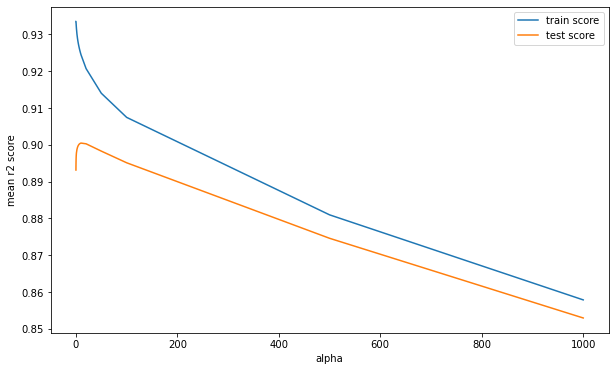

In [86]:
#plot of mean r2 vs lambda value
plt.figure(figsize=(10,6))

plt.plot(ridge_cv_res['param_alpha'],ridge_cv_res['mean_train_score'])
plt.plot(ridge_cv_res['param_alpha'],ridge_cv_res['mean_test_score'])
plt.legend(['train score','test score'])
plt.xlabel('alpha')
plt.ylabel('mean r2 score')
plt.show()

# Graph Analysis

From the Graph it is clearly visible that as the alpha increases the r2_score will decrease and optimal value for alpha is 10 

In [87]:
# Fit Ridge Regression model for alpha = 10 - Optimal Lambda
alpha = model_cv.best_params_["alpha"]
ridge =Ridge(alpha = alpha)
ridge.fit(xtrain,ytrain)
ypred_train = pd.DataFrame(ridge.predict(xtrain),columns=["SalePrice"])
ypred_test = pd.DataFrame(ridge.predict(xtest),columns=["SalePrice"])

ridgemetric = Resultmetric(ypred_train,ypred_test)

print("\n Ridge Intercept \n",ridge.intercept_)
print("\n Ridge Coef \n",ridge.coef_)

R2 Score train =  0.9227340934340781
R2 Score test =  0.8917076742999732
RMSE score train =  0.1101895918284
RMSE score test =  0.1335961706306932

 Ridge Intercept 
 11.816404219554057

 Ridge Coef 
 [ 0.03046972  0.00340903  0.07440469  0.05175242  0.00229394  0.00487277
 -0.01739616 -0.00669188 -0.01150247  0.01208596 -0.01362297  0.05745219
 -0.00727514  0.0253998   0.03785139  0.08412461  0.02672899  0.01766733
  0.01623515  0.00335663 -0.00928229 -0.00370583  0.02568941 -0.00840779
  0.03404271  0.01328639  0.00917471  0.00317533 -0.00050908 -0.05928303
 -0.02256457  0.00689233  0.00052328  0.00847748 -0.01856578  0.00189009
 -0.03779311 -0.01519488 -0.02074738 -0.05619892 -0.00945963 -0.00102053
  0.02009885 -0.01082719  0.04528634  0.02058857 -0.01085776  0.06271837
  0.03930294  0.05669882  0.01535979  0.02571799 -0.02961336 -0.01090365
  0.0057452   0.00129759 -0.00631622  0.02695009  0.0452318  -0.01210733
  0.08253964 -0.07114506 -0.00471809 -0.05817907 -0.04438017 -0.03909

# Inference : With RidgeRegression we are able to achieve R2 score of .89  and which is near to that of train r2 score as well which is .92

- Also we can see that the RMSE score for test set is .138 which means the variance in data is by .133 unit

- lets create Lasso regression if the score can further increase

In [88]:
#model coefficent & intercept
model_ridge_param = list(ridge.coef_)

model_ridge_param.insert(0,ridge.intercept_)
model_ridge_param = [i for i in model_ridge_param]

cols = xtrain.columns.values
ridge_param_list = list(zip(cols,model_ridge_param))
ridge_param_list

[('LotArea', 11.816404219554057),
 ('LotShape', 0.03046971558261607),
 ('OverallQual', 0.003409028718800283),
 ('OverallCond', 0.07440469221719379),
 ('MasVnrArea', 0.0517524230196114),
 ('ExterQual', 0.0022939380784200206),
 ('BsmtQual', 0.0048727720122308405),
 ('BsmtExposure', -0.017396160352120375),
 ('BsmtFinType1', -0.006691876728877129),
 ('BsmtFinSF1', -0.011502473632590094),
 ('BsmtUnfSF', 0.012085955407788349),
 ('TotalBsmtSF', -0.013622972614921769),
 ('HeatingQC', 0.057452186679561264),
 ('1stFlrSF', -0.007275136261405684),
 ('2ndFlrSF', 0.025399800342470594),
 ('GrLivArea', 0.03785138987445952),
 ('BsmtFullBath', 0.08412461477233639),
 ('FullBath', 0.02672899051814488),
 ('HalfBath', 0.017667328244597158),
 ('BedroomAbvGr', 0.016235148086634073),
 ('KitchenQual', 0.0033566337159943852),
 ('TotRmsAbvGrd', -0.00928228530684804),
 ('Fireplaces', -0.0037058342068922823),
 ('GarageFinish', 0.02568940940006473),
 ('GarageCars', -0.00840779013170862),
 ('GarageArea', 0.0340427057

- > # Top 10 Features of Ridge Regression


In [89]:
ridge_params_df = pd.DataFrame({'Params':cols,'Coef':ridge.coef_})
(ridge_params_df.sort_values('Coef',ascending=False)).head(11)

,Params,Coef
15,GrLivArea,0.084125
60,Neighborhood_Crawfor,0.082540
2,OverallQual,0.074405
97,Exterior1st_BrkFace,0.066271
70,Neighborhood_NridgHt,0.064637
75,Neighborhood_Somerst,0.063677
47,MSZoning_FV,0.062718
76,Neighborhood_StoneBr,0.057854
11,TotalBsmtSF,0.057452
49,MSZoning_RL,0.056699


# Residual Analysis Ridge Regression

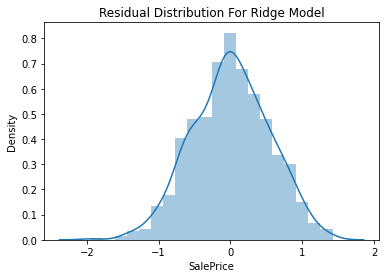

In [90]:
res = ytrain - ypred_train['SalePrice']
sb.distplot(res,bins=20)
plt.title('Residual Distribution For Ridge Model')
plt.show()

# Data is normally Distributed

# Lasso Regression

# Optimal value

In [91]:
#Perform cross validation for different value of alpha

lasso =Lasso()

param_value = {"alpha":[0.0001,0.0002,0.0003,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,
                   1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,20,50,100,500,1000]}
folds=5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = param_value , 
                        scoring = "r2", 
                        cv = folds, 
                        verbose = 1, 
                        return_train_score = True)
model_cv.fit(xtrain,ytrain)
print(model_cv.best_params_)

#checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)
# best Score is .89 and the alpha is .0001

Fitting 5 folds for each of 30 candidates, totalling 150 fits
{'alpha': 0.0002}
{'alpha': 0.0002}
0.9002145161059684


In [92]:
# Fit Lasso Regression model for alpha = .0002 - Optimal Lambda
alpha = model_cv.best_params_["alpha"]
lasso =Lasso(alpha = alpha)
lasso.fit(xtrain,ytrain)
print("\n Lasso Coef \n",lasso.coef_)


 Lasso Coef 
 [ 2.89664394e-02  4.08702612e-03  6.84174036e-02  5.03927134e-02
  3.31891375e-04  4.12740009e-03 -1.58577201e-02 -7.00181390e-03
 -1.01937958e-02  1.31421246e-02 -1.36186495e-02  5.98778173e-02
 -5.57373832e-03  1.14227366e-02  3.16709545e-02  9.93746046e-02
  2.49740664e-02  1.50062634e-02  1.43898438e-02  1.25523613e-03
 -9.78085667e-03 -3.80911215e-03  2.43985680e-02 -8.41495995e-03
  3.69368220e-02  1.10590420e-02  9.18995597e-03  2.64754816e-03
 -3.53046272e-04 -5.61515451e-02 -2.30812446e-02  5.99421293e-03
 -0.00000000e+00  0.00000000e+00 -2.66669450e-02 -0.00000000e+00
 -3.49382835e-02 -0.00000000e+00 -3.49445011e-02 -7.77423992e-02
 -0.00000000e+00 -0.00000000e+00  1.58287812e-02 -0.00000000e+00
  4.58191449e-02  5.79114861e-03 -0.00000000e+00  2.36808501e-01
  2.21512411e-01  2.25533809e-01  1.83862745e-01  2.56681864e-02
 -3.11868707e-02 -0.00000000e+00  3.53970184e-03  0.00000000e+00
  0.00000000e+00  2.99281281e-02  5.85358878e-02 -4.94215106e-04
  1.077075

# Predict ytrain and ytest

In [93]:

ylasso_pred_train = pd.DataFrame(lasso.predict(xtrain),columns=["SalePrice"])
ylasso_pred_test = pd.DataFrame(lasso.predict(xtest),columns=["SalePrice"])

lassometric = Resultmetric(ylasso_pred_train,ylasso_pred_test)

R2 Score train =  0.9264938360791735
R2 Score test =  0.8945034519512849
RMSE score train =  0.10747525925509803
RMSE score test =  0.13186037122520552


Inference : With LassoRegression we are able to achieve R2 score of .894 and which is near to that of train r2 score which is .9264 as well 
Also we can see that the RMSE score for test set is .134 

Also we can see the coefficient for features which are not required is set to 0 for multiple features

In [94]:
#model coefficent & intercept
model_lasso_param = list(lasso.coef_)

model_lasso_param.insert(0,lasso.intercept_)
model_lasso_param = [i for i in model_lasso_param]

cols = xtrain.columns.values
lasso_param_list = list(zip(cols,model_lasso_param))
lasso_param_list

[('LotArea', 11.665369085590752),
 ('LotShape', 0.028966439424883732),
 ('OverallQual', 0.0040870261202700705),
 ('OverallCond', 0.06841740356208262),
 ('MasVnrArea', 0.050392713390892706),
 ('ExterQual', 0.0003318913754169735),
 ('BsmtQual', 0.0041274000858941735),
 ('BsmtExposure', -0.01585772007911729),
 ('BsmtFinType1', -0.007001813896115119),
 ('BsmtFinSF1', -0.010193795819085576),
 ('BsmtUnfSF', 0.013142124565632522),
 ('TotalBsmtSF', -0.013618649460918711),
 ('HeatingQC', 0.05987781727423406),
 ('1stFlrSF', -0.005573738324787179),
 ('2ndFlrSF', 0.011422736645413975),
 ('GrLivArea', 0.03167095447462722),
 ('BsmtFullBath', 0.09937460455002628),
 ('FullBath', 0.024974066351416736),
 ('HalfBath', 0.01500626335954881),
 ('BedroomAbvGr', 0.01438984376484116),
 ('KitchenQual', 0.0012552361255513077),
 ('TotRmsAbvGrd', -0.009780856673145525),
 ('Fireplaces', -0.0038091121465303555),
 ('GarageFinish', 0.02439856804865622),
 ('GarageCars', -0.008414959947716735),
 ('GarageArea', 0.0369368

In [95]:
# List of Top 10 Lasso Regression Coeffiecints

lasso_params_df = pd.DataFrame({'Params':cols,'Coef':lasso.coef_})
(lasso_params_df.sort_values('Coef',ascending=False)).head(11)

,Params,Coef
47,MSZoning_FV,0.236809
49,MSZoning_RL,0.225534
48,MSZoning_RH,0.221512
50,MSZoning_RM,0.183863
60,Neighborhood_Crawfor,0.107708
76,Neighborhood_StoneBr,0.105206
15,GrLivArea,0.099375
70,Neighborhood_NridgHt,0.096258
97,Exterior1st_BrkFace,0.089215
75,Neighborhood_Somerst,0.084379


In [96]:
#result of cross validation
lasso_cv_res = pd.DataFrame(model_cv.cv_results_)
lasso_cv_res['param_alpha'] = lasso_cv_res['param_alpha'].astype('float32')
lasso_cv_res.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.018240,0.003098,0.001630,0.000173,0.0001,{'alpha': 0.0001},0.910645,0.875635,0.870404,0.918101,0.922711,0.899499,0.022023,3,0.930138,0.937549,0.937313,0.927805,0.926687,0.931899,0.004653
1,0.013828,0.001310,0.001436,0.000044,0.0002,{'alpha': 0.0002},0.912654,0.875794,0.866672,0.921612,0.924341,0.900215,0.024150,1,0.928132,0.935253,0.935292,0.925457,0.924033,0.929633,0.004789
2,0.012056,0.001718,0.001395,0.000053,0.0003,{'alpha': 0.0003},0.914060,0.875481,0.862959,0.921580,0.923647,0.899545,0.025278,2,0.925879,0.933026,0.933019,0.923084,0.921475,0.927297,0.004883
3,0.008170,0.001364,0.001372,0.000012,0.0010,{'alpha': 0.001},0.916201,0.869778,0.864266,0.920680,0.918316,0.897848,0.025269,4,0.914414,0.922105,0.924815,0.913240,0.911372,0.917189,0.005281
4,0.005051,0.002367,0.001376,0.000011,0.0100,{'alpha': 0.01},0.907612,0.856036,0.851619,0.908485,0.900498,0.884850,0.025519,5,0.885713,0.897877,0.897839,0.884368,0.883768,0.889913,0.006518


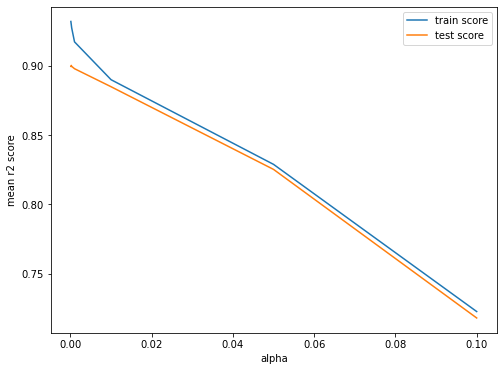

In [97]:
#plot graph for train /test score vs mean r2 score around optimal lambda 0.0002
plt.figure(figsize=(8,6))
plt.plot(lasso_cv_res[lasso_cv_res['param_alpha']<=0.1]['param_alpha'],lasso_cv_res[lasso_cv_res['param_alpha']<=0.1]['mean_train_score'])
plt.plot(lasso_cv_res[lasso_cv_res['param_alpha']<=0.1]['param_alpha'],lasso_cv_res[lasso_cv_res['param_alpha']<=0.1]['mean_test_score'])

plt.legend(['train score','test score'])
plt.xlabel('alpha')
plt.ylabel('mean r2 score')
plt.show()

# Graph Analysis

From the Graph it is clearly visible that as the alpha increases the r2_score will decrease and optimal value for alpha is .0002

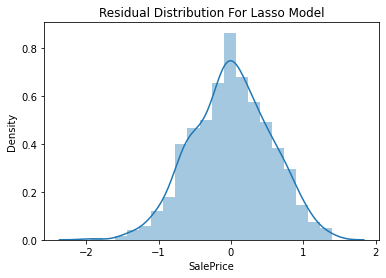

In [98]:
res = ytrain - ylasso_pred_train['SalePrice']
sb.distplot(res,bins=20)
plt.title('Residual Distribution For Lasso Model')
plt.show()

# Error Terms are normally distributed model seems to be fine

# Final Conclusion

In [99]:
# Compare the different metrics for Linear Regression, Ridge Regression and Lassoregression
metric_column = pd.Series(["R2 Score (train)","R2 Score (test)","RMSE (train)","RMSE (test)"], name = "Metric")
Linear_Metric = pd.Series(LinearRegMetric, name = "LinearRegression")
ridge_metric = pd.Series(ridgemetric, name = "RidgeRegression")
lasso_metric = pd.Series(lassometric, name = "LassoRegression")

finalmetric = pd.concat([metric_column,Linear_Metric,ridge_metric,lasso_metric], axis = 1)
finalmetric

,Metric,LinearRegression,RidgeRegression,LassoRegression
0,R2 Score (train),0.900911,0.922734,0.926494
1,R2 Score (test),0.874180,0.891708,0.894503
2,RMSE (train),0.124784,0.110190,0.107475
3,RMSE (test),0.144002,0.133596,0.131860


### Ridge Regression 
 - - Optimal lambda value : 10
 - - R2 Score Train : .9227 , 
 - - R2 Test Score : .8917 
 - - RMSE test is .133596


### Lasso Regression 
- - Optimal lambda value : .0002 
- - R2 Score Train : .926494 
- - R2 Test Score : .8945 
- - RMSE test is .131860

In [100]:

# List of Top 10 Lasso Regression Coeffiecints

lasso_params_df = pd.DataFrame({'Params':cols,'Coef':lasso.coef_})
(lasso_params_df.sort_values('Coef',ascending=False)).head(11)


,Params,Coef
47,MSZoning_FV,0.236809
49,MSZoning_RL,0.225534
48,MSZoning_RH,0.221512
50,MSZoning_RM,0.183863
60,Neighborhood_Crawfor,0.107708
76,Neighborhood_StoneBr,0.105206
15,GrLivArea,0.099375
70,Neighborhood_NridgHt,0.096258
97,Exterior1st_BrkFace,0.089215
75,Neighborhood_Somerst,0.084379


In [101]:
# List of Top 10 Ridge Regression Coeffiecints
ridge_params_df = pd.DataFrame({'Params':cols,'Coef':ridge.coef_})
(ridge_params_df.sort_values('Coef',ascending=False)).head(11)


,Params,Coef
15,GrLivArea,0.084125
60,Neighborhood_Crawfor,0.082540
2,OverallQual,0.074405
97,Exterior1st_BrkFace,0.066271
70,Neighborhood_NridgHt,0.064637
75,Neighborhood_Somerst,0.063677
47,MSZoning_FV,0.062718
76,Neighborhood_StoneBr,0.057854
11,TotalBsmtSF,0.057452
49,MSZoning_RL,0.056699


## However all the models are showing almost close R2_score but can see the model R2_Score for lasso regresion is slightly better so we will go with it 

Final Model Top 10 Features 

- MSZoning_FV
- MSZoning_RL
- MSZoning_RH
- MSZoning_RM
- Neighborhood_Crawfor
- Neighborhood_StoneBr
- GrLivArea
- Neighborhood_NridgHt
- Exterior1st_BrkFace
- Neighborhood_Somerst
- Neighborhood_NoRidge